In [1]:
"""
CLASIFICACIÓN BINARIA DEL IRIS
==============================

Objetivos:
- Comprender el aprendizaje supervisado (problemas de clasificación)
- Utilizar scikit-learn para realizar clasificación
- Comparar diferentes métodos de clasificación
- Implementar clasificación binaria y multiclase

Dataset: Iris (3 especies, 4 características)
Enfoque: Clasificación binaria usando 2 características
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 8)
sns.set_style("whitegrid")

print("="*80)
print("CLASIFICACIÓN BINARIA DEL IRIS")
print("Aprendizaje Supervisado con Scikit-Learn")
print("="*80)


CLASIFICACIÓN BINARIA DEL IRIS
Aprendizaje Supervisado con Scikit-Learn


In [2]:
# ============================================================================
# 1. OBJETIVO Y COMPRENSIÓN DEL PROBLEMA
# ============================================================================

print("📊 1. OBJETIVO Y COMPRENSIÓN DEL PROBLEMA")
print("="*45)

print("""
🎯 OBJETIVOS DE APRENDIZAJE:
────────────────────────────

🔹 APRENDIZAJE SUPERVISADO:
   • Comprender los conceptos fundamentales de clasificación
   • Diferenciar entre clasificación binaria y multiclase
   • Conocer el flujo completo de un problema de clasificación

🔹 SCIKIT-LEARN:
   • Implementar algoritmos de clasificación
   • Realizar preprocesamiento de datos
   • Evaluar modelos con métricas apropiadas

🔹 COMPARACIÓN DE MÉTODOS:
   • K-Nearest Neighbors (k-NN)
   • Regresión Logística
   • Support Vector Machine (SVM)
   • Árbol de Decisión
   • Random Forest

📊 DATASET IRIS:
   • 150 muestras de flores iris
   • 3 especies: Setosa, Versicolor, Virginica
   • 4 características: longitud/ancho de sépalo y pétalo
   • Problema clásico de clasificación en machine learning
""")

print("✅ Objetivos establecidos")


📊 1. OBJETIVO Y COMPRENSIÓN DEL PROBLEMA

🎯 OBJETIVOS DE APRENDIZAJE:
────────────────────────────

🔹 APRENDIZAJE SUPERVISADO:
   • Comprender los conceptos fundamentales de clasificación
   • Diferenciar entre clasificación binaria y multiclase
   • Conocer el flujo completo de un problema de clasificación

🔹 SCIKIT-LEARN:
   • Implementar algoritmos de clasificación
   • Realizar preprocesamiento de datos
   • Evaluar modelos con métricas apropiadas

🔹 COMPARACIÓN DE MÉTODOS:
   • K-Nearest Neighbors (k-NN)
   • Regresión Logística
   • Support Vector Machine (SVM)
   • Árbol de Decisión
   • Random Forest

📊 DATASET IRIS:
   • 150 muestras de flores iris
   • 3 especies: Setosa, Versicolor, Virginica
   • 4 características: longitud/ancho de sépalo y pétalo
   • Problema clásico de clasificación en machine learning

✅ Objetivos establecidos


In [3]:
# ============================================================================
# 2. CARGA Y EXPLORACIÓN DEL DATASET IRIS
# ============================================================================

print("\n🌸 2. CARGA Y EXPLORACIÓN DEL DATASET IRIS")
print("="*50)

# Cargar el dataset iris
iris = datasets.load_iris()
X_full = iris.data
y_full = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("📊 INFORMACIÓN DEL DATASET:")
print(f"   • Número de muestras: {X_full.shape[0]}")
print(f"   • Número de características: {X_full.shape[1]}")
print(f"   • Número de clases: {len(target_names)}")
print(f"   • Clases: {target_names}")
print(f"   • Características: {feature_names}")

# Crear DataFrame para mejor manipulación
df_iris = pd.DataFrame(X_full, columns=feature_names)
df_iris['species'] = pd.Categorical.from_codes(y_full, target_names)
df_iris['target'] = y_full

print(f"\n📋 Primeras 5 filas del dataset:")
display(df_iris.head())

print(f"\n📈 Estadísticas descriptivas:")
display(df_iris.describe())

print(f"\n🔢 Distribución de clases:")
class_counts = df_iris['species'].value_counts()
for species, count in class_counts.items():
    percentage = (count / len(df_iris)) * 100
    print(f"   • {species}: {count} muestras ({percentage:.1f}%)")

print("✅ Dataset cargado y explorado")



🌸 2. CARGA Y EXPLORACIÓN DEL DATASET IRIS
📊 INFORMACIÓN DEL DATASET:
   • Número de muestras: 150
   • Número de características: 4
   • Número de clases: 3
   • Clases: ['setosa' 'versicolor' 'virginica']
   • Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

📋 Primeras 5 filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0



📈 Estadísticas descriptivas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



🔢 Distribución de clases:
   • setosa: 50 muestras (33.3%)
   • versicolor: 50 muestras (33.3%)
   • virginica: 50 muestras (33.3%)
✅ Dataset cargado y explorado



🔍 3. ANÁLISIS EXPLORATORIO DE DATOS
📊 Matriz de diagramas de dispersión:


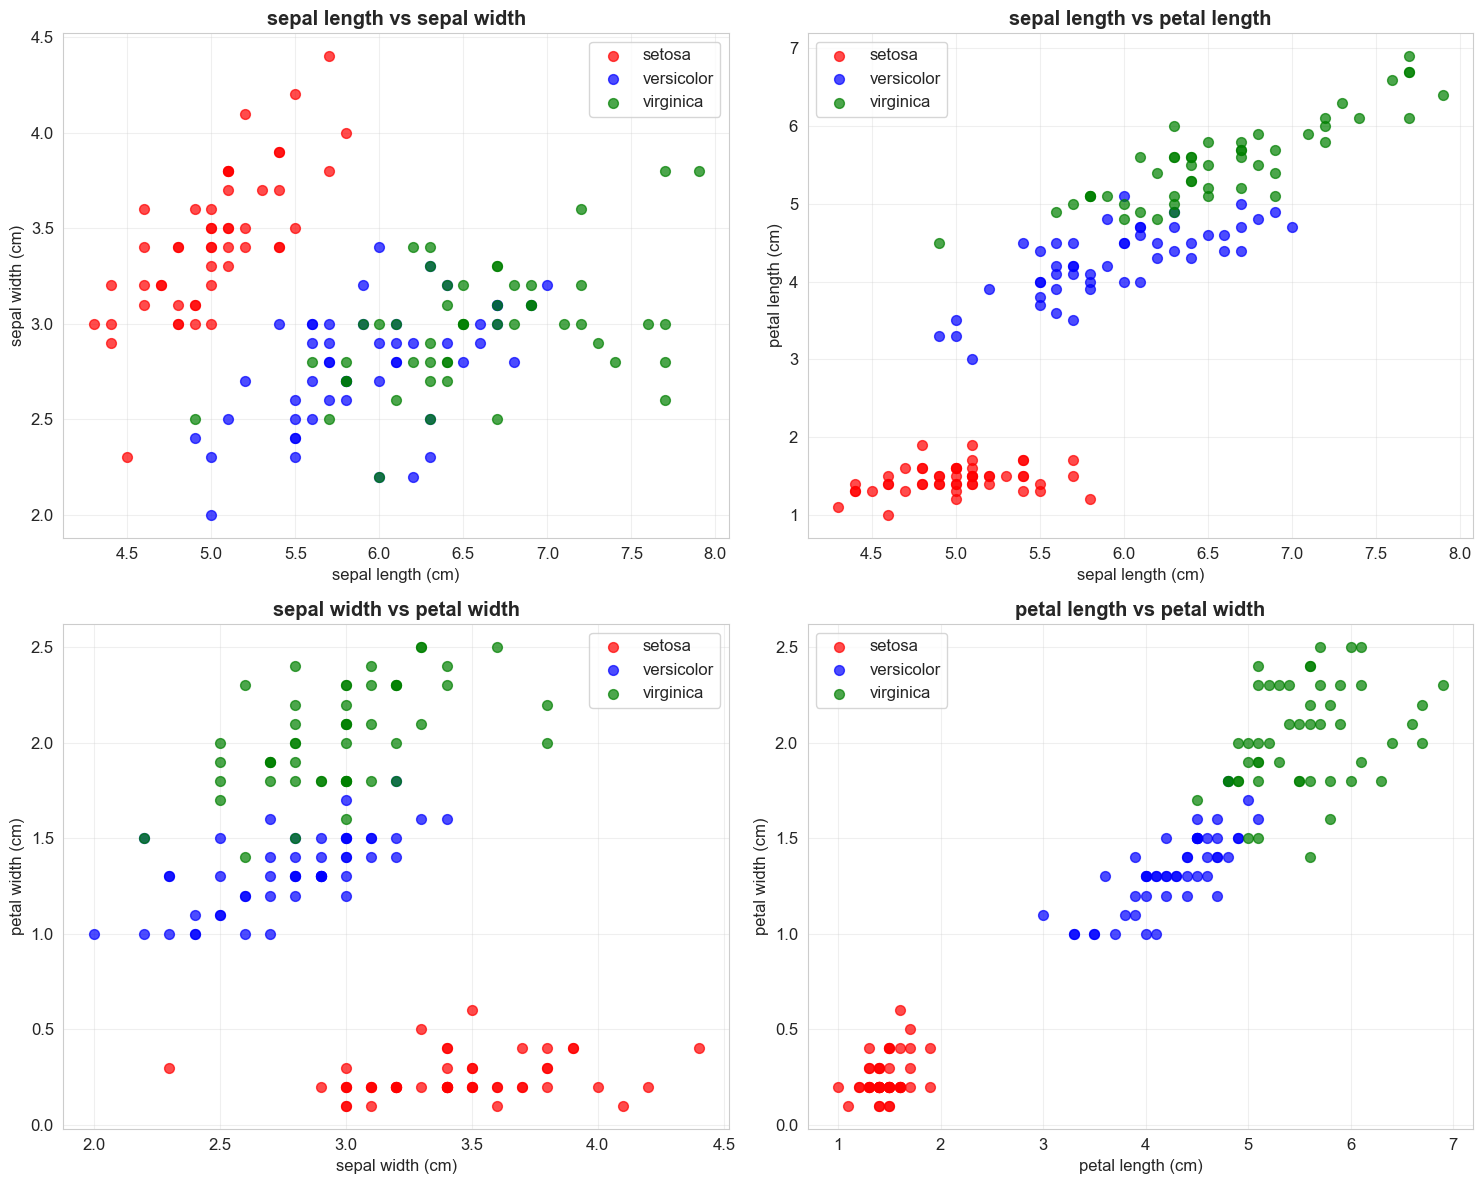


📦 Diagramas de caja por especie:


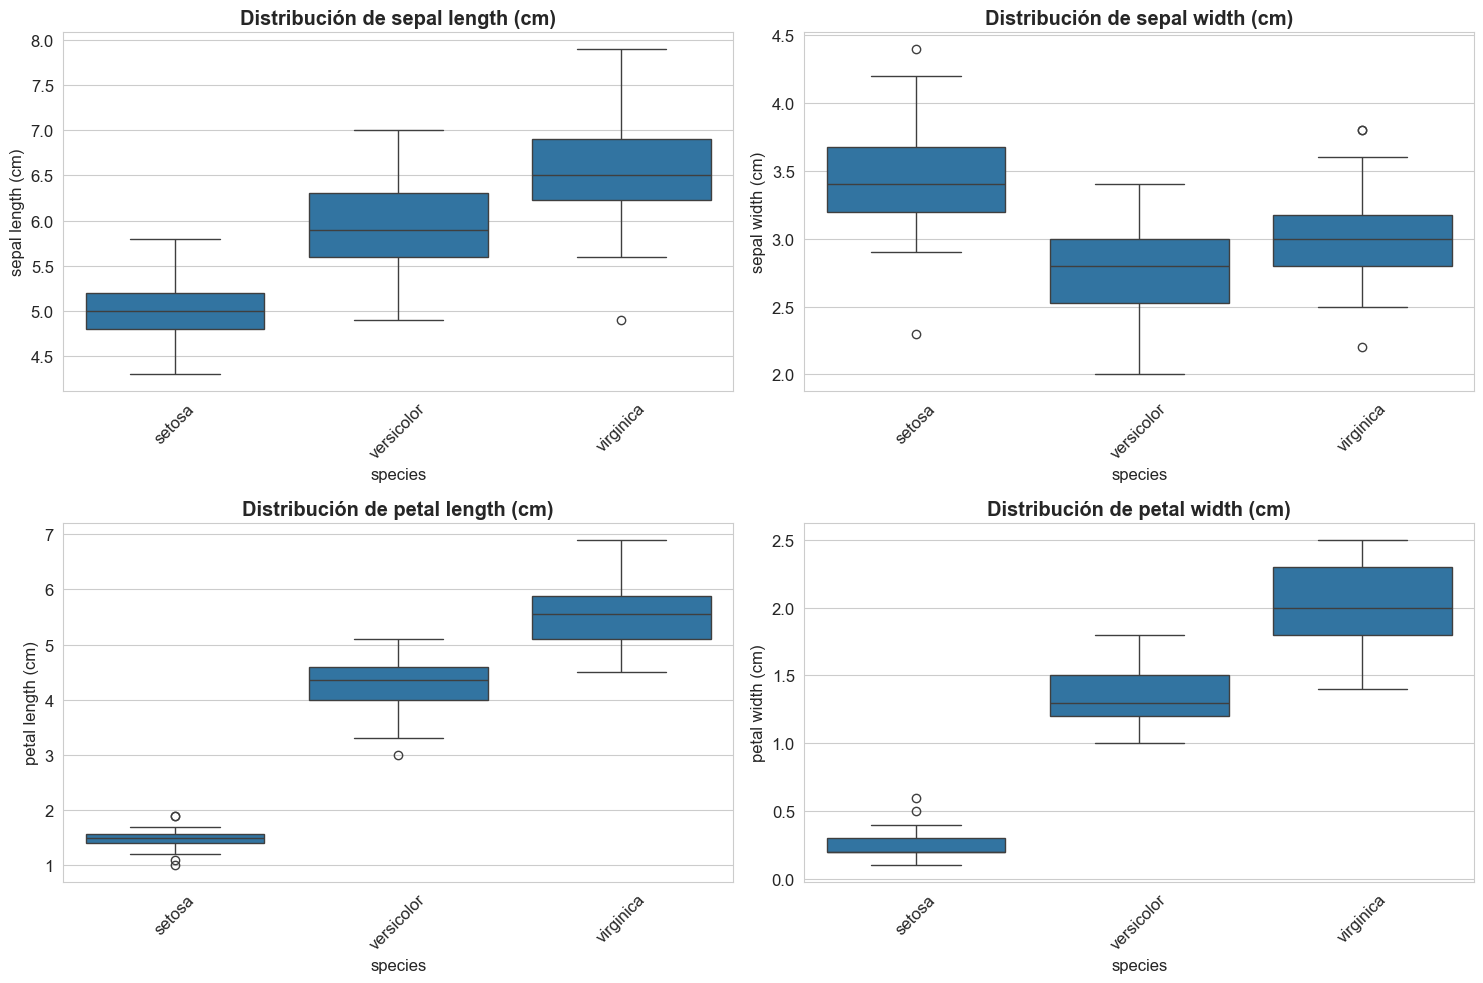


🎻 Diagramas de violín por especie:


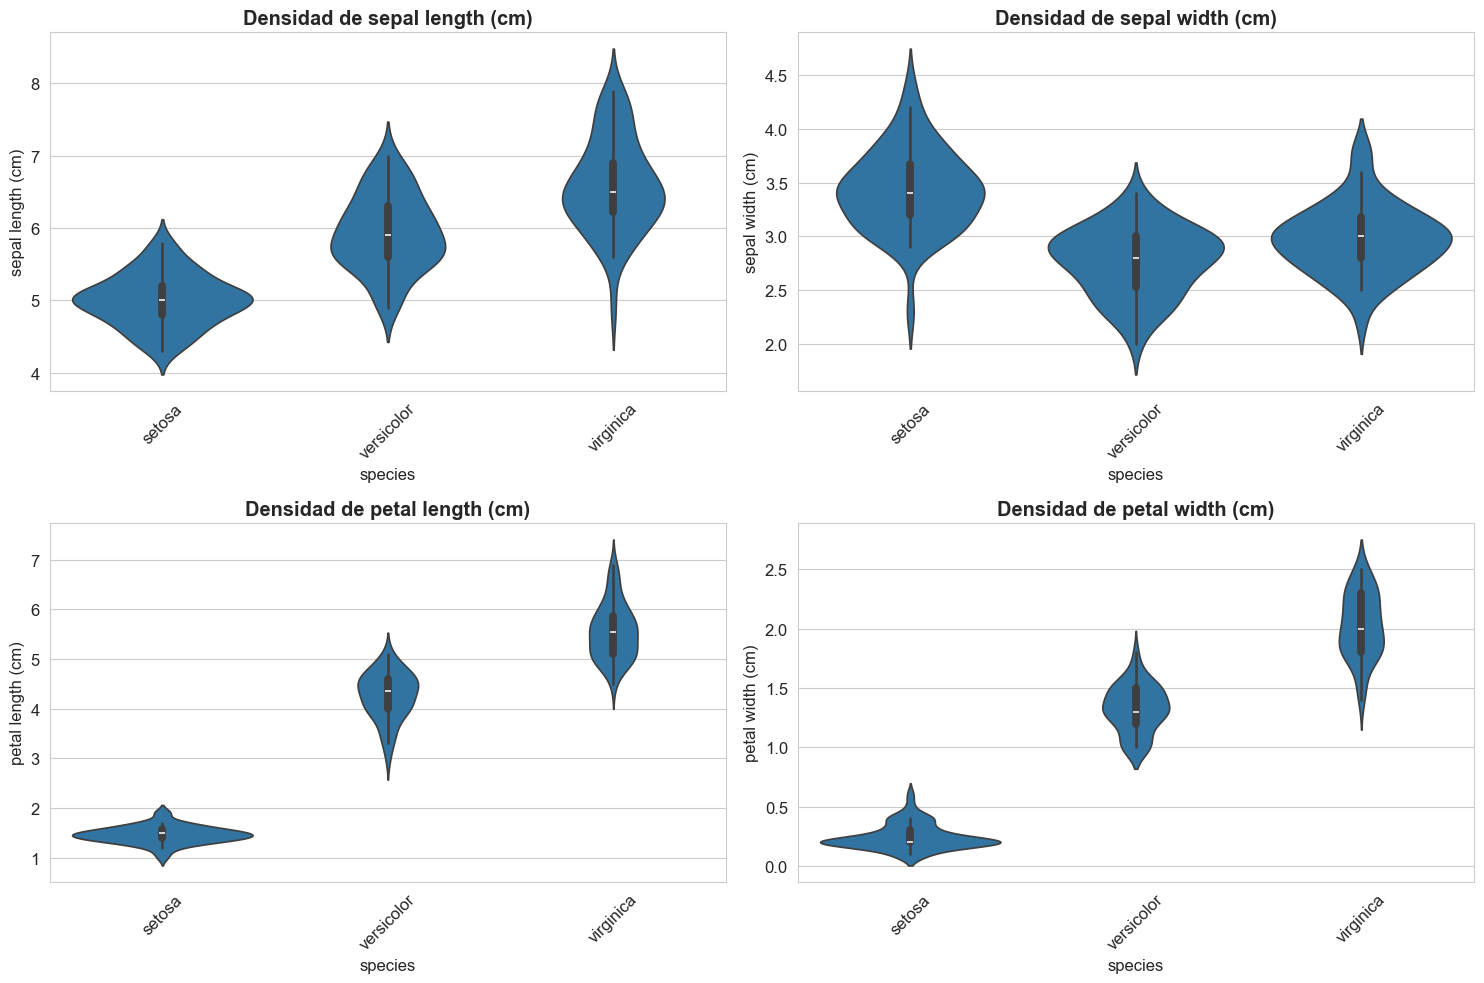


🔗 Matriz de correlación entre características:


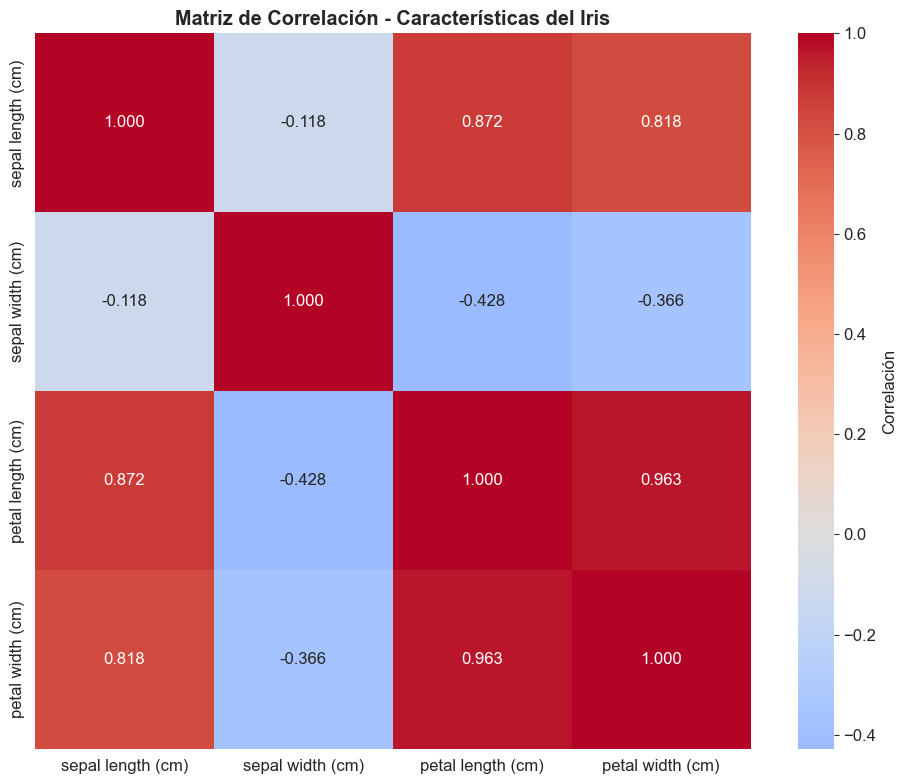

✅ Análisis exploratorio completado


In [4]:
# ============================================================================
# 3. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# ============================================================================

print("\n🔍 3. ANÁLISIS EXPLORATORIO DE DATOS")
print("="*40)

# Matriz de diagramas de dispersión
print("📊 Matriz de diagramas de dispersión:")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Combinaciones de características para gráficos de dispersión
feature_pairs = [
    (0, 1, 'sepal length vs sepal width'),
    (0, 2, 'sepal length vs petal length'), 
    (1, 3, 'sepal width vs petal width'),
    (2, 3, 'petal length vs petal width')
]

colors = ['red', 'blue', 'green']
species_labels = target_names

for idx, (i, j, title) in enumerate(feature_pairs):
    ax = axes[idx//2, idx%2]
    
    for species_idx, species in enumerate(species_labels):
        mask = y_full == species_idx
        ax.scatter(X_full[mask, i], X_full[mask, j], 
                  c=colors[species_idx], label=species, alpha=0.7, s=50)
    
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel(feature_names[j])
    ax.set_title(title, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Diagramas de caja para cada característica
print("\n📦 Diagramas de caja por especie:")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    sns.boxplot(data=df_iris, x='species', y=feature, ax=axes[i])
    axes[i].set_title(f'Distribución de {feature}', fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Diagramas de violín
print("\n🎻 Diagramas de violín por especie:")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    sns.violinplot(data=df_iris, x='species', y=feature, ax=axes[i])
    axes[i].set_title(f'Densidad de {feature}', fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Matriz de correlación
print("\n🔗 Matriz de correlación entre características:")
correlation_matrix = df_iris.drop(['species', 'target'], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación - Características del Iris', fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Análisis exploratorio completado")



⚙️ 4. PREPARACIÓN PARA CLASIFICACIÓN BINARIA
🎯 CONFIGURACIÓN DEL PROBLEMA:
   • Especies seleccionadas: Versicolor y Virginica
   • Características seleccionadas: Sepal Length y Petal Length
   • Tipo de problema: Clasificación Binaria

📊 DATASET BINARIO PREPARADO:
   • Número de muestras: 100
   • Características utilizadas: ['sepal length (cm)', 'petal length (cm)']
   • Clases: ['Versicolor', 'Virginica']

🔢 Distribución de clases:
   • Versicolor: 50 muestras (50.0%)
   • Virginica: 50 muestras (50.0%)


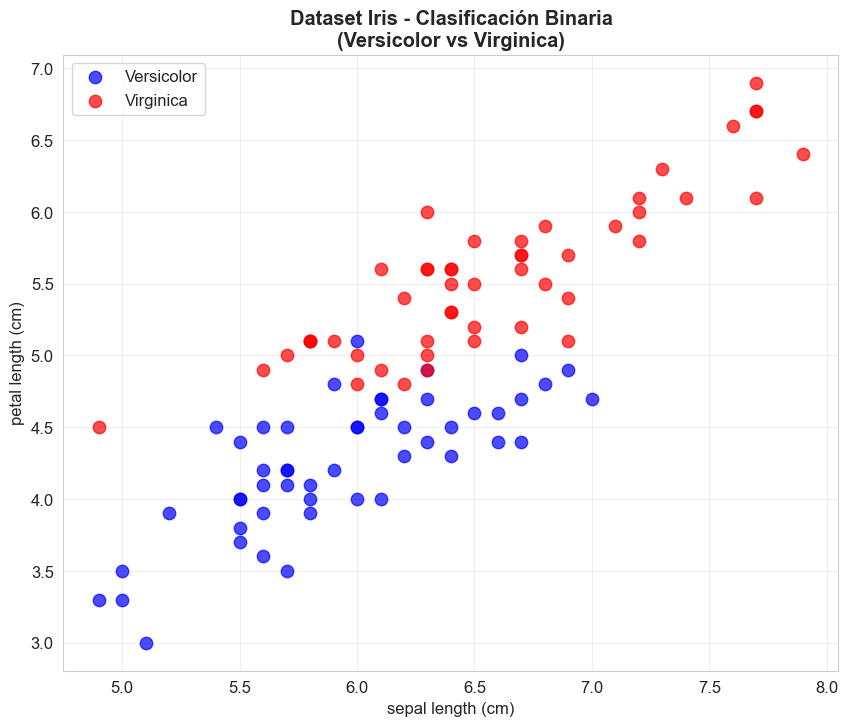

✅ Preparación para clasificación binaria completada


In [6]:
# ============================================================================
# 4. PREPARACIÓN PARA CLASIFICACIÓN BINARIA
# ============================================================================

print("\n⚙️ 4. PREPARACIÓN PARA CLASIFICACIÓN BINARIA")
print("="*50)

print("🎯 CONFIGURACIÓN DEL PROBLEMA:")
print("   • Especies seleccionadas: Versicolor y Virginica")
print("   • Características seleccionadas: Sepal Length y Petal Length")
print("   • Tipo de problema: Clasificación Binaria")

# Seleccionar solo Versicolor (1) y Virginica (2)
binary_mask = (y_full == 1) | (y_full == 2)
X_binary_full = X_full[binary_mask]
y_binary_full = y_full[binary_mask]

# Convertir etiquetas a 0 y 1 para clasificación binaria
y_binary_full = y_binary_full - 1  # Versicolor=0, Virginica=1

# Seleccionar características: Sepal Length (0) y Petal Length (2)
feature_indices = [0, 2]
X_binary = X_binary_full[:, feature_indices]
y_binary = y_binary_full

selected_features = [feature_names[i] for i in feature_indices]
binary_target_names = ['Versicolor', 'Virginica']

print(f"\n📊 DATASET BINARIO PREPARADO:")
print(f"   • Número de muestras: {X_binary.shape[0]}")
print(f"   • Características utilizadas: {selected_features}")
print(f"   • Clases: {binary_target_names}")

# Distribución de clases en el dataset binario - CORREGIDO
unique, counts = np.unique(y_binary, return_counts=True)
print(f"\n🔢 Distribución de clases:")
for i, (label, count) in enumerate(zip(binary_target_names, counts)):
    percentage = (count / len(y_binary)) * 100
    print(f"   • {label}: {count} muestras ({percentage:.1f}%)")

# Visualización del dataset binario
plt.figure(figsize=(10, 8))
colors = ['blue', 'red']
for i, target_name in enumerate(binary_target_names):
    mask = y_binary == i
    plt.scatter(X_binary[mask, 0], X_binary[mask, 1], 
                c=colors[i], label=target_name, alpha=0.7, s=80)

plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Dataset Iris - Clasificación Binaria\n(Versicolor vs Virginica)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Preparación para clasificación binaria completada")



🔄 5. DIVISIÓN DE DATOS Y PREPROCESAMIENTO
📊 DIVISIÓN DE DATOS:
   • Datos de entrenamiento: 75 muestras
   • Datos de prueba: 25 muestras
   • Proporción: 75% entrenamiento, 25% prueba

🔢 Distribución en conjunto de entrenamiento:
   • Versicolor: 37 (49.3%)
   • Virginica: 38 (50.7%)

🔢 Distribución en conjunto de prueba:
   • Versicolor: 13 (52.0%)
   • Virginica: 12 (48.0%)

⚖️ ESTANDARIZACIÓN DE DATOS:
   • Ajustando StandardScaler con datos de entrenamiento
   • Transformando ambos conjuntos con los mismos parámetros

📈 Estadísticas antes de estandarización:
Entrenamiento:
   • Media: [6.34266667 4.948     ]
   • Std: [0.64872662 0.83464324]

📈 Estadísticas después de estandarización:
Entrenamiento:
   • Media: [2.12274642e-15 1.63128770e-15]
   • Std: [1. 1.]


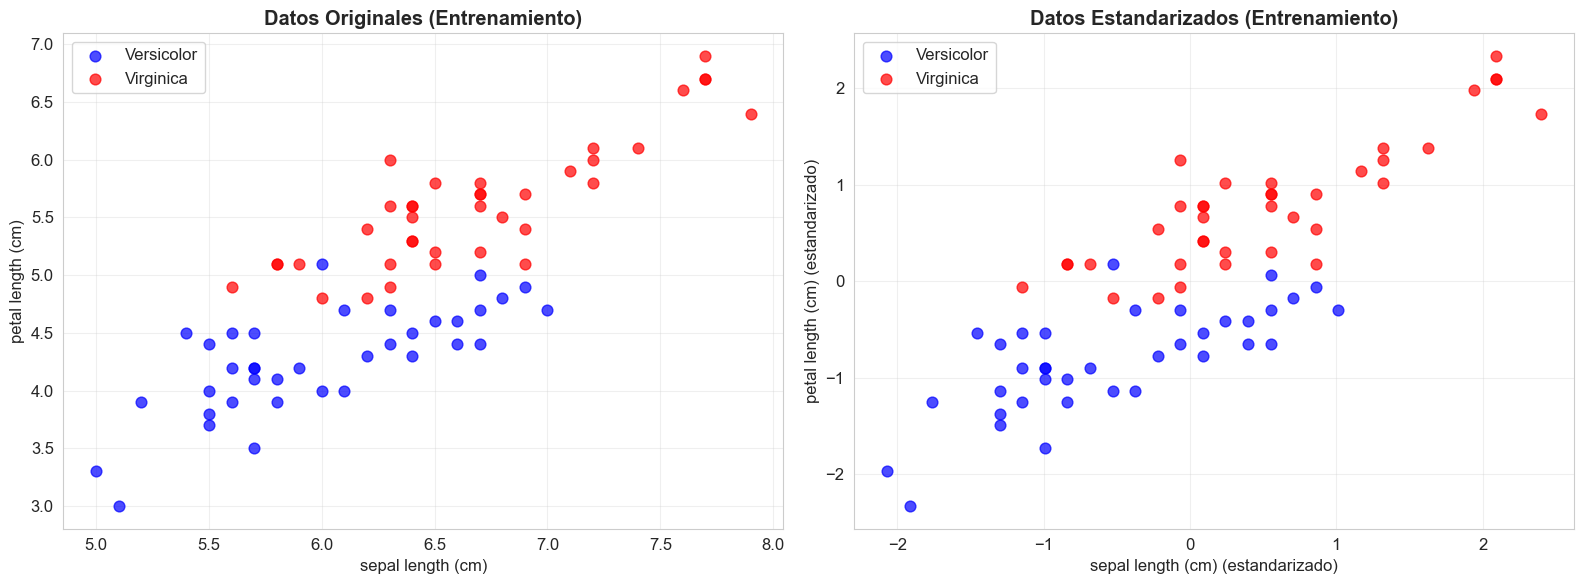

✅ División y preprocesamiento completados


In [7]:
# ============================================================================
# 5. DIVISIÓN DE DATOS Y PREPROCESAMIENTO
# ============================================================================

print("\n🔄 5. DIVISIÓN DE DATOS Y PREPROCESAMIENTO")
print("="*48)

# División de datos: 75% entrenamiento, 25% validación
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, 
    test_size=0.25, 
    random_state=42, 
    stratify=y_binary  # Mantener proporción de clases
)

print("📊 DIVISIÓN DE DATOS:")
print(f"   • Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"   • Datos de prueba: {X_test.shape[0]} muestras")
print(f"   • Proporción: 75% entrenamiento, 25% prueba")

# Verificar distribución de clases en conjuntos
print(f"\n🔢 Distribución en conjunto de entrenamiento:")
train_unique, train_counts = np.unique(y_train, return_counts=True)
for i, count in enumerate(train_counts):
    percentage = (count / len(y_train)) * 100
    print(f"   • {binary_target_names[i]}: {count} ({percentage:.1f}%)")

print(f"\n🔢 Distribución en conjunto de prueba:")
test_unique, test_counts = np.unique(y_test, return_counts=True)
for i, count in enumerate(test_counts):
    percentage = (count / len(y_test)) * 100
    print(f"   • {binary_target_names[i]}: {count} ({percentage:.1f}%)")

# Estandarización de datos
print(f"\n⚖️ ESTANDARIZACIÓN DE DATOS:")
print("   • Ajustando StandardScaler con datos de entrenamiento")
print("   • Transformando ambos conjuntos con los mismos parámetros")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n📈 Estadísticas antes de estandarización:")
print("Entrenamiento:")
print(f"   • Media: {X_train.mean(axis=0)}")
print(f"   • Std: {X_train.std(axis=0)}")

print(f"\n📈 Estadísticas después de estandarización:")
print("Entrenamiento:")
print(f"   • Media: {X_train_scaled.mean(axis=0)}")
print(f"   • Std: {X_train_scaled.std(axis=0)}")

# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Datos originales
for i, target_name in enumerate(binary_target_names):
    mask = y_train == i
    ax1.scatter(X_train[mask, 0], X_train[mask, 1], 
                c=colors[i], label=target_name, alpha=0.7, s=60)

ax1.set_xlabel(selected_features[0])
ax1.set_ylabel(selected_features[1])
ax1.set_title('Datos Originales (Entrenamiento)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Datos estandarizados
for i, target_name in enumerate(binary_target_names):
    mask = y_train == i
    ax2.scatter(X_train_scaled[mask, 0], X_train_scaled[mask, 1], 
                c=colors[i], label=target_name, alpha=0.7, s=60)

ax2.set_xlabel(f'{selected_features[0]} (estandarizado)')
ax2.set_ylabel(f'{selected_features[1]} (estandarizado)')
ax2.set_title('Datos Estandarizados (Entrenamiento)', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ División y preprocesamiento completados")


In [8]:
# ============================================================================
# 6. FUNCIÓN DE VISUALIZACIÓN DE REGIONES DE DECISIÓN
# ============================================================================

print("\n🎨 6. FUNCIÓN DE VISUALIZACIÓN")
print("="*35)

def decision_region(X, y, model, step=0.01, title='Región de Decisión', 
                   xlabel='Eje X', ylabel='Eje Y', 
                   target_names=['Versicolor', 'Virginica']):
    """
    Visualiza las regiones de decisión de un modelo de clasificación
    
    Parámetros:
    -----------
    X : array-like, shape = [n_samples, 2]
        Características de entrada (solo 2D)
    y : array-like, shape = [n_samples]
        Etiquetas verdaderas
    model : objeto estimador de sklearn
        Modelo entrenado
    step : float, default=0.01
        Resolución de la malla
    title : str
        Título del gráfico
    xlabel, ylabel : str
        Etiquetas de los ejes
    target_names : list
        Nombres de las clases
    """
    from matplotlib.colors import ListedColormap
    import matplotlib.patches as mpatches
    
    # Colores para scatter y regiones
    scatter_color = ['blue', 'red']
    contourf_color = ['lightblue', 'lightcoral']
    n_class = 2
    
    # Crear malla de puntos
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
        np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step)
    )
    
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # Crear el gráfico
    plt.figure(figsize=(10, 8))
    plt.title(title, fontweight='bold', fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Dibujar regiones de decisión
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, 
                cmap=ListedColormap(contourf_color), alpha=0.8)
    
    # Dibujar líneas de decisión
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, 
               colors='yellow', linewidths=3, alpha=0.8)
    
    # Dibujar puntos de datos
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], 
                   s=100, color=scatter_color[i], label=target_names[i], 
                   marker='o', edgecolors='black', linewidth=1)
    
    # Crear leyenda
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) 
               for i in range(n_class)]
    plt.legend(handles=patches)
    plt.grid(True, alpha=0.3)
    plt.show()

print("🎨 Función de visualización de regiones de decisión creada")
print("   • Permite visualizar cómo cada algoritmo divide el espacio de características")
print("   • Muestra puntos de datos reales sobrepuestos a las regiones")
print("   • Útil para entender el comportamiento de diferentes clasificadores")

print("\n✅ Función de visualización lista")



🎨 6. FUNCIÓN DE VISUALIZACIÓN
🎨 Función de visualización de regiones de decisión creada
   • Permite visualizar cómo cada algoritmo divide el espacio de características
   • Muestra puntos de datos reales sobrepuestos a las regiones
   • Útil para entender el comportamiento de diferentes clasificadores

✅ Función de visualización lista



🔍 7. CLASIFICACIÓN CON K-NEAREST NEIGHBORS
📚 ACERCA DE K-NEAREST NEIGHBORS:

🔹 PRINCIPIO:
   • Clasifica basándose en los k vecinos más cercanos
   • Usa distancia euclidiana por defecto
   • Método no paramétrico (no asume distribución de datos)

🔹 VENTAJAS:
   • Simple de entender e implementar
   • No requiere entrenamiento previo
   • Funciona bien con datos no lineales

🔹 DESVENTAJAS:
   • Sensible a la escala de características
   • Computacionalmente costoso para predicción
   • Sensible a ruido y datos irrelevantes


🧪 PROBANDO DIFERENTES VALORES DE K:
   k=1: Train Acc=1.000, Test Acc=0.840, F1=0.833
   k=3: Train Acc=0.947, Test Acc=0.800, F1=0.815
   k=5: Train Acc=0.973, Test Acc=0.840, F1=0.846
   k=7: Train Acc=0.973, Test Acc=0.880, F1=0.880
   k=9: Train Acc=0.960, Test Acc=0.880, F1=0.880

🏆 MEJOR RESULTADO: k=7
   • Precisión en entrenamiento: 0.973
   • Precisión en prueba: 0.880
   • Precisión (Precision): 0.846
   • Recall: 0.917
   • F1-Score: 0.880

📊 MATRIZ DE 

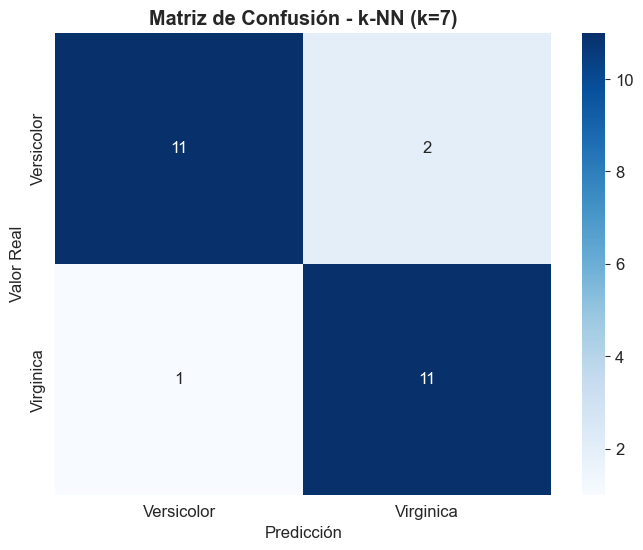


📋 REPORTE DETALLADO DE CLASIFICACIÓN:
              precision    recall  f1-score   support

  Versicolor       0.92      0.85      0.88        13
   Virginica       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



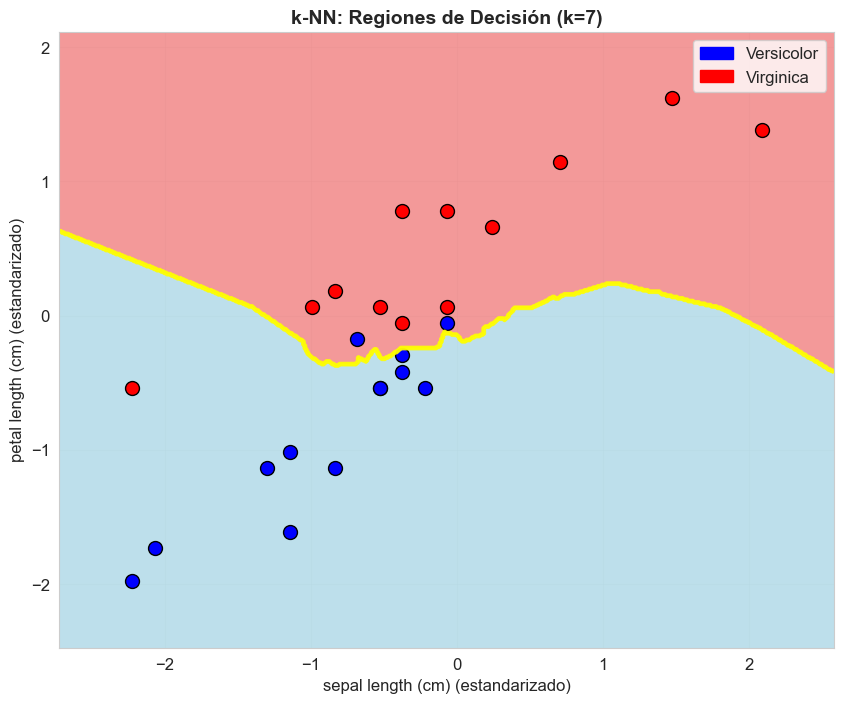

✅ Análisis de k-NN completado


In [9]:
# ============================================================================
# 7. CLASIFICACIÓN CON K-NEAREST NEIGHBORS (k-NN)
# ============================================================================

print("\n🔍 7. CLASIFICACIÓN CON K-NEAREST NEIGHBORS")
print("="*50)

print("📚 ACERCA DE K-NEAREST NEIGHBORS:")
print("""
🔹 PRINCIPIO:
   • Clasifica basándose en los k vecinos más cercanos
   • Usa distancia euclidiana por defecto
   • Método no paramétrico (no asume distribución de datos)

🔹 VENTAJAS:
   • Simple de entender e implementar
   • No requiere entrenamiento previo
   • Funciona bien con datos no lineales

🔹 DESVENTAJAS:
   • Sensible a la escala de características
   • Computacionalmente costoso para predicción
   • Sensible a ruido y datos irrelevantes
""")

# Probar diferentes valores de k
k_values = [1, 3, 5, 7, 9]
knn_results = {}

print(f"\n🧪 PROBANDO DIFERENTES VALORES DE K:")

for k in k_values:
    # Entrenar modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred_train = knn.predict(X_train_scaled)
    y_pred_test = knn.predict(X_test_scaled)
    
    # Métricas
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    knn_results[k] = {
        'model': knn,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred_test
    }
    
    print(f"   k={k}: Train Acc={train_accuracy:.3f}, Test Acc={test_accuracy:.3f}, F1={f1:.3f}")

# Seleccionar mejor k
best_k = max(knn_results.keys(), key=lambda k: knn_results[k]['test_accuracy'])
best_knn = knn_results[best_k]

print(f"\n🏆 MEJOR RESULTADO: k={best_k}")
print(f"   • Precisión en entrenamiento: {best_knn['train_accuracy']:.3f}")
print(f"   • Precisión en prueba: {best_knn['test_accuracy']:.3f}")
print(f"   • Precisión (Precision): {best_knn['precision']:.3f}")
print(f"   • Recall: {best_knn['recall']:.3f}")
print(f"   • F1-Score: {best_knn['f1']:.3f}")

# Matriz de confusión
print(f"\n📊 MATRIZ DE CONFUSIÓN (k={best_k}):")
cm = confusion_matrix(y_test, best_knn['y_pred'])
print(cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=binary_target_names, yticklabels=binary_target_names)
plt.title(f'Matriz de Confusión - k-NN (k={best_k})', fontweight='bold')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Reporte de clasificación detallado
print(f"\n📋 REPORTE DETALLADO DE CLASIFICACIÓN:")
print(classification_report(y_test, best_knn['y_pred'], 
                          target_names=binary_target_names))

# Visualización de regiones de decisión
decision_region(X_test_scaled, y_test, best_knn['model'], 
               title=f'k-NN: Regiones de Decisión (k={best_k})',
               xlabel=f'{selected_features[0]} (estandarizado)',
               ylabel=f'{selected_features[1]} (estandarizado)',
               target_names=binary_target_names)

print("✅ Análisis de k-NN completado")



📈 8. CLASIFICACIÓN CON REGRESIÓN LOGÍSTICA
📚 ACERCA DE REGRESIÓN LOGÍSTICA:

🔹 PRINCIPIO:
   • Usa función logística (sigmoide) para mapear probabilidades
   • Encuentra frontera de decisión lineal
   • Método paramétrico basado en máxima verosimilitud

🔹 VENTAJAS:
   • Rápido y eficiente
   • Proporciona probabilidades de clase
   • No requiere ajuste de hiperparámetros complejos
   • Menos propenso al sobreajuste

🔹 DESVENTAJAS:
   • Asume relación lineal entre características y log-odds
   • Sensible a outliers
   • Requiere más muestras para características categóricas


📊 RESULTADOS DE REGRESIÓN LOGÍSTICA:
   • Precisión en entrenamiento: 0.947
   • Precisión en prueba: 0.920
   • Precisión (Precision): 0.917
   • Recall: 0.917
   • F1-Score: 0.917

🔢 COEFICIENTES DEL MODELO:
   • Intercepto: 0.181
   • sepal length (cm): -0.175
   • petal length (cm): 3.228

📊 MATRIZ DE CONFUSIÓN:
[[12  1]
 [ 1 11]]


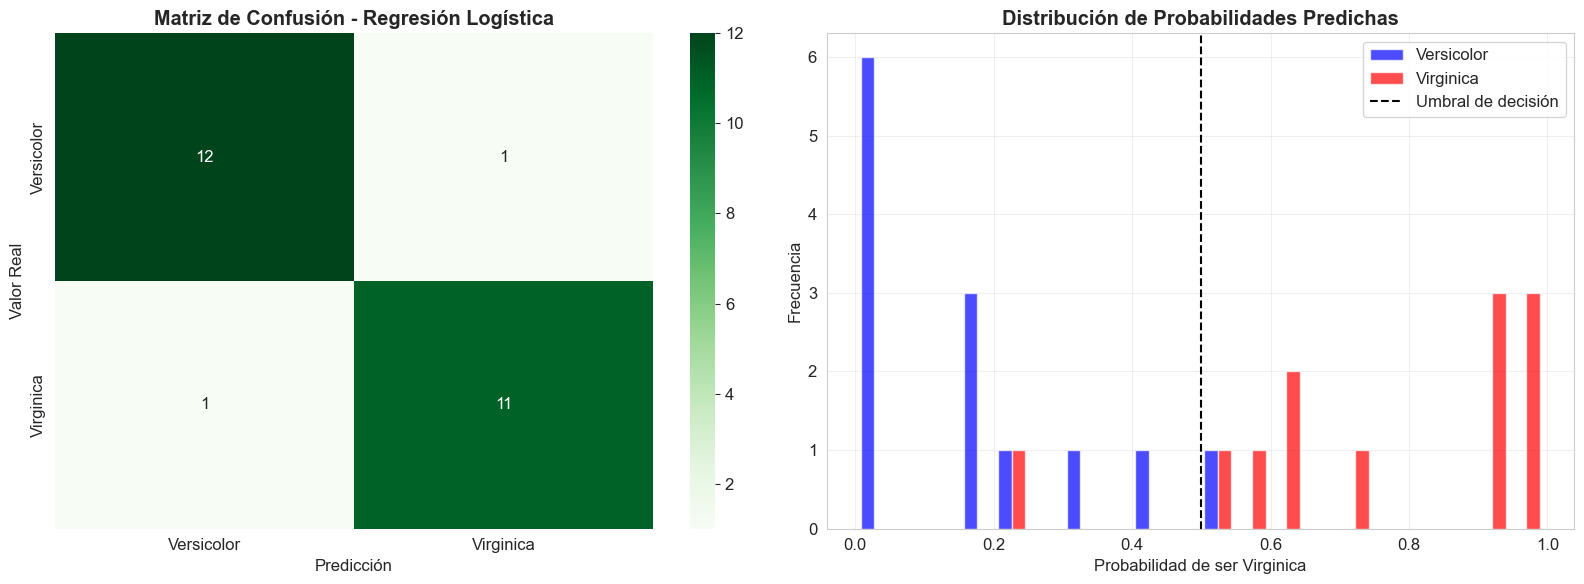


📋 REPORTE DETALLADO DE CLASIFICACIÓN:
              precision    recall  f1-score   support

  Versicolor       0.92      0.92      0.92        13
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



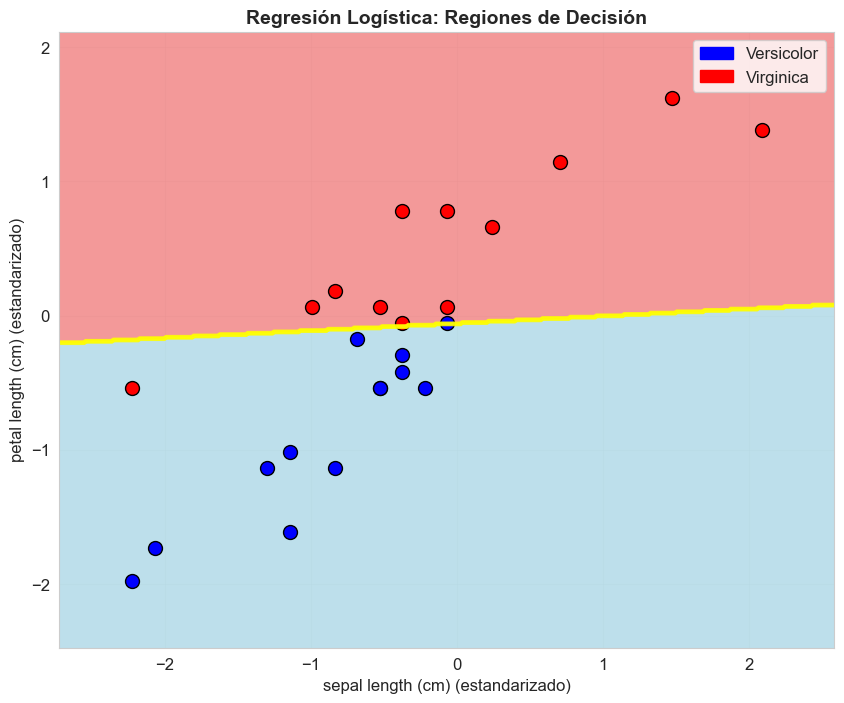

✅ Análisis de Regresión Logística completado


In [10]:
# ============================================================================
# 8. CLASIFICACIÓN CON REGRESIÓN LOGÍSTICA
# ============================================================================

print("\n📈 8. CLASIFICACIÓN CON REGRESIÓN LOGÍSTICA")
print("="*50)

print("📚 ACERCA DE REGRESIÓN LOGÍSTICA:")
print("""
🔹 PRINCIPIO:
   • Usa función logística (sigmoide) para mapear probabilidades
   • Encuentra frontera de decisión lineal
   • Método paramétrico basado en máxima verosimilitud

🔹 VENTAJAS:
   • Rápido y eficiente
   • Proporciona probabilidades de clase
   • No requiere ajuste de hiperparámetros complejos
   • Menos propenso al sobreajuste

🔹 DESVENTAJAS:
   • Asume relación lineal entre características y log-odds
   • Sensible a outliers
   • Requiere más muestras para características categóricas
""")

# Entrenar modelo de regresión logística
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)

# Métricas
train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)
test_accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
precision_lr = precision_score(y_test, y_pred_test_lr)
recall_lr = recall_score(y_test, y_pred_test_lr)
f1_lr = f1_score(y_test, y_pred_test_lr)

print(f"\n📊 RESULTADOS DE REGRESIÓN LOGÍSTICA:")
print(f"   • Precisión en entrenamiento: {train_accuracy_lr:.3f}")
print(f"   • Precisión en prueba: {test_accuracy_lr:.3f}")
print(f"   • Precisión (Precision): {precision_lr:.3f}")
print(f"   • Recall: {recall_lr:.3f}")
print(f"   • F1-Score: {f1_lr:.3f}")

# Coeficientes del modelo
print(f"\n🔢 COEFICIENTES DEL MODELO:")
print(f"   • Intercepto: {lr.intercept_[0]:.3f}")
for i, feature in enumerate(selected_features):
    print(f"   • {feature}: {lr.coef_[0][i]:.3f}")

# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_test_lr)
print(f"\n📊 MATRIZ DE CONFUSIÓN:")
print(cm_lr)

# Visualizaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusión
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', 
           xticklabels=binary_target_names, yticklabels=binary_target_names, ax=axes[0])
axes[0].set_title('Matriz de Confusión - Regresión Logística', fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

# Probabilidades de predicción
probabilities = y_pred_proba_lr[:, 1]  # Probabilidad de clase positiva (Virginica)
axes[1].hist([probabilities[y_test==0], probabilities[y_test==1]], 
            bins=20, alpha=0.7, label=binary_target_names, color=['blue', 'red'])
axes[1].axvline(x=0.5, color='black', linestyle='--', label='Umbral de decisión')
axes[1].set_xlabel('Probabilidad de ser Virginica')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Probabilidades Predichas', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Reporte de clasificación
print(f"\n📋 REPORTE DETALLADO DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred_test_lr, 
                          target_names=binary_target_names))

# Visualización de regiones de decisión
decision_region(X_test_scaled, y_test, lr, 
               title='Regresión Logística: Regiones de Decisión',
               xlabel=f'{selected_features[0]} (estandarizado)',
               ylabel=f'{selected_features[1]} (estandarizado)',
               target_names=binary_target_names)

print("✅ Análisis de Regresión Logística completado")



⚔️ 9. CLASIFICACIÓN CON SUPPORT VECTOR MACHINE
📚 ACERCA DE SUPPORT VECTOR MACHINE:

🔹 PRINCIPIO:
   • Encuentra el hiperplano óptimo que separa las clases
   • Maximiza el margen entre clases
   • Usa vectores de soporte para definir la frontera

🔹 VENTAJAS:
   • Efectivo en espacios de alta dimensión
   • Usa subconjunto de puntos de entrenamiento (vectores de soporte)
   • Versátil con diferentes funciones kernel
   • Funciona bien con datos no linealmente separables

🔹 DESVENTAJAS:
   • No proporciona estimaciones de probabilidad directas
   • Sensible a escalado de características
   • Puede ser lento en datasets grandes


🧪 PROBANDO DIFERENTES KERNELS:
   linear: Train Acc=0.947, Test Acc=0.920, F1=0.917
     Vectores de soporte: [11 10]
   rbf: Train Acc=0.973, Test Acc=0.880, F1=0.880
     Vectores de soporte: [14 13]
   poly: Train Acc=0.827, Test Acc=0.680, F1=0.733
     Vectores de soporte: [21 20]

🏆 MEJOR RESULTADO: kernel=linear
   • Precisión en entrenamiento: 0.947
   •

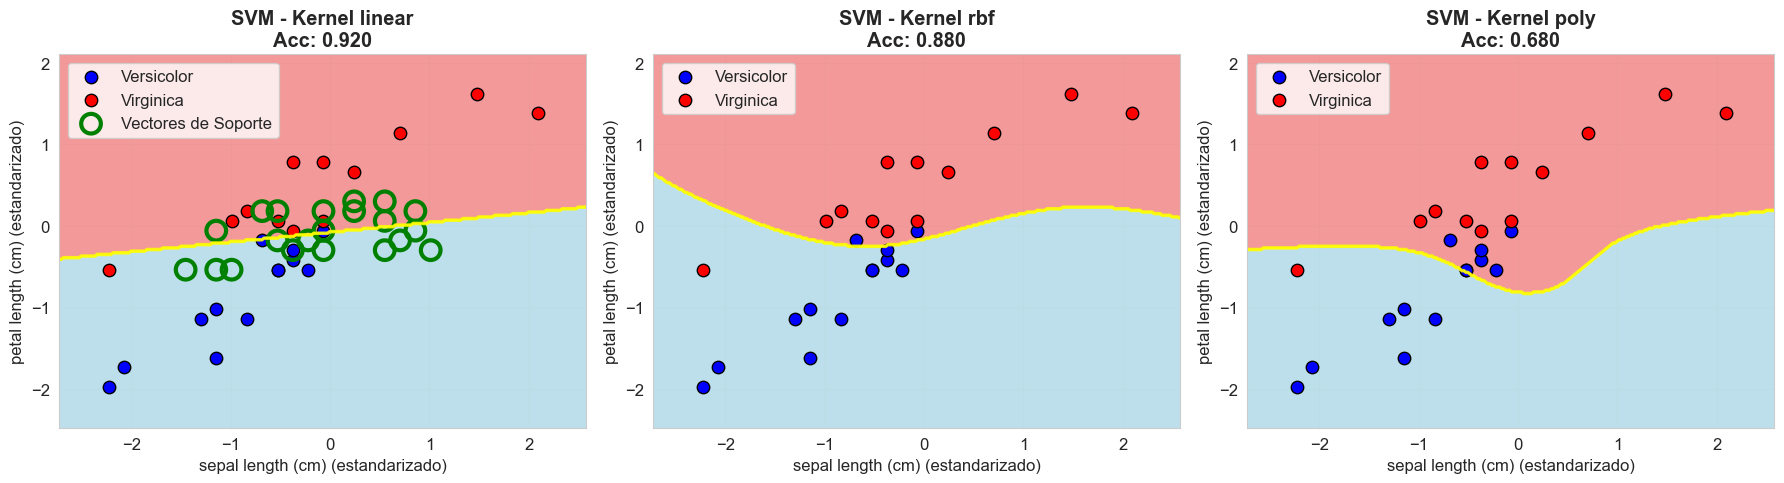


📋 REPORTE DETALLADO DE CLASIFICACIÓN (kernel=linear):
              precision    recall  f1-score   support

  Versicolor       0.92      0.92      0.92        13
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

✅ Análisis de SVM completado


In [11]:
# ============================================================================
# 9. CLASIFICACIÓN CON SUPPORT VECTOR MACHINE (SVM)
# ============================================================================

print("\n⚔️ 9. CLASIFICACIÓN CON SUPPORT VECTOR MACHINE")
print("="*50)

print("📚 ACERCA DE SUPPORT VECTOR MACHINE:")
print("""
🔹 PRINCIPIO:
   • Encuentra el hiperplano óptimo que separa las clases
   • Maximiza el margen entre clases
   • Usa vectores de soporte para definir la frontera

🔹 VENTAJAS:
   • Efectivo en espacios de alta dimensión
   • Usa subconjunto de puntos de entrenamiento (vectores de soporte)
   • Versátil con diferentes funciones kernel
   • Funciona bien con datos no linealmente separables

🔹 DESVENTAJAS:
   • No proporciona estimaciones de probabilidad directas
   • Sensible a escalado de características
   • Puede ser lento en datasets grandes
""")

# Probar diferentes kernels
kernels = ['linear', 'rbf', 'poly']
svm_results = {}

print(f"\n🧪 PROBANDO DIFERENTES KERNELS:")

for kernel in kernels:
    # Entrenar modelo
    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        svm = SVC(kernel=kernel, random_state=42)
    
    svm.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred_train = svm.predict(X_train_scaled)
    y_pred_test = svm.predict(X_test_scaled)
    
    # Métricas
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    svm_results[kernel] = {
        'model': svm,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred_test,
        'n_support_vectors': svm.n_support_
    }
    
    print(f"   {kernel}: Train Acc={train_accuracy:.3f}, Test Acc={test_accuracy:.3f}, F1={f1:.3f}")
    print(f"     Vectores de soporte: {svm.n_support_}")

# Seleccionar mejor kernel
best_kernel = max(svm_results.keys(), key=lambda k: svm_results[k]['test_accuracy'])
best_svm = svm_results[best_kernel]

print(f"\n🏆 MEJOR RESULTADO: kernel={best_kernel}")
print(f"   • Precisión en entrenamiento: {best_svm['train_accuracy']:.3f}")
print(f"   • Precisión en prueba: {best_svm['test_accuracy']:.3f}")
print(f"   • Precisión (Precision): {best_svm['precision']:.3f}")
print(f"   • Recall: {best_svm['recall']:.3f}")
print(f"   • F1-Score: {best_svm['f1']:.3f}")
print(f"   • Vectores de soporte: {best_svm['n_support_vectors']}")

# Matriz de confusión
cm_svm = confusion_matrix(y_test, best_svm['y_pred'])
print(f"\n📊 MATRIZ DE CONFUSIÓN (kernel={best_kernel}):")
print(cm_svm)

# Visualización comparativa de kernels
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (kernel, results) in enumerate(svm_results.items()):
    # Crear subplot para cada kernel
    ax = axes[idx]
    
    # Usar la función decision_region adaptada para subplot
    X_test_plot = X_test_scaled
    y_test_plot = y_test
    model = results['model']
    
    # Crear malla
    step = 0.02
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X_test_plot[:,0])-0.5, np.max(X_test_plot[:,0])+0.5, step),
        np.arange(np.min(X_test_plot[:,1])-0.5, np.max(X_test_plot[:,1])+0.5, step)
    )
    
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred_mesh = model.predict(mesh).reshape(mesh_f0.shape)
    
    # Dibujar regiones
    from matplotlib.colors import ListedColormap
    scatter_color = ['blue', 'red']
    contourf_color = ['lightblue', 'lightcoral']
    
    ax.contourf(mesh_f0, mesh_f1, y_pred_mesh, 1, 
               cmap=ListedColormap(contourf_color), alpha=0.8)
    ax.contour(mesh_f0, mesh_f1, y_pred_mesh, 1, 
              colors='yellow', linewidths=2, alpha=0.8)
    
    # Dibujar puntos
    for i, target in enumerate(np.unique(y_test_plot)):
        ax.scatter(X_test_plot[y_test_plot==target][:, 0], 
                  X_test_plot[y_test_plot==target][:, 1], 
                  s=80, color=scatter_color[i], label=binary_target_names[i], 
                  marker='o', edgecolors='black', linewidth=1)
    
    # Resaltar vectores de soporte si es el mejor modelo
    if kernel == best_kernel:
        support_vectors = model.support_vectors_
        ax.scatter(support_vectors[:, 0], support_vectors[:, 1], 
                  s=200, facecolors='none', edgecolors='green', 
                  linewidth=3, label='Vectores de Soporte')
    
    ax.set_title(f'SVM - Kernel {kernel}\nAcc: {results["test_accuracy"]:.3f}', 
                fontweight='bold')
    ax.set_xlabel(f'{selected_features[0]} (estandarizado)')
    ax.set_ylabel(f'{selected_features[1]} (estandarizado)')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Reporte de clasificación
print(f"\n📋 REPORTE DETALLADO DE CLASIFICACIÓN (kernel={best_kernel}):")
print(classification_report(y_test, best_svm['y_pred'], 
                          target_names=binary_target_names))

print("✅ Análisis de SVM completado")



🌳 10. CLASIFICACIÓN CON ÁRBOL DE DECISIÓN
📚 ACERCA DE ÁRBOL DE DECISIÓN:

🔹 PRINCIPIO:
   • Crea un modelo en forma de árbol de decisiones
   • Divide iterativamente el dataset basándose en características
   • Usa medidas como Gini o entropía para divisiones óptimas

🔹 VENTAJAS:
   • Fácil de entender e interpretar
   • Requiere poca preparación de datos
   • Maneja valores numéricos y categóricos
   • Puede capturar relaciones no lineales

🔹 DESVENTAJAS:
   • Propenso al sobreajuste
   • Inestable (pequeños cambios pueden crear árboles diferentes)
   • Puede crear sesgos si algunas clases dominan


🧪 PROBANDO DIFERENTES PROFUNDIDADES MÁXIMAS:
   Profundidad 3: Train Acc=0.987, Test Acc=0.880, F1=0.880
   Profundidad 5: Train Acc=1.000, Test Acc=0.840, F1=0.833
   Profundidad 7: Train Acc=1.000, Test Acc=0.840, F1=0.833
   Profundidad Sin límite: Train Acc=1.000, Test Acc=0.840, F1=0.833

🏆 MEJOR RESULTADO: profundidad=3
   • Precisión en entrenamiento: 0.987
   • Precisión en prueba

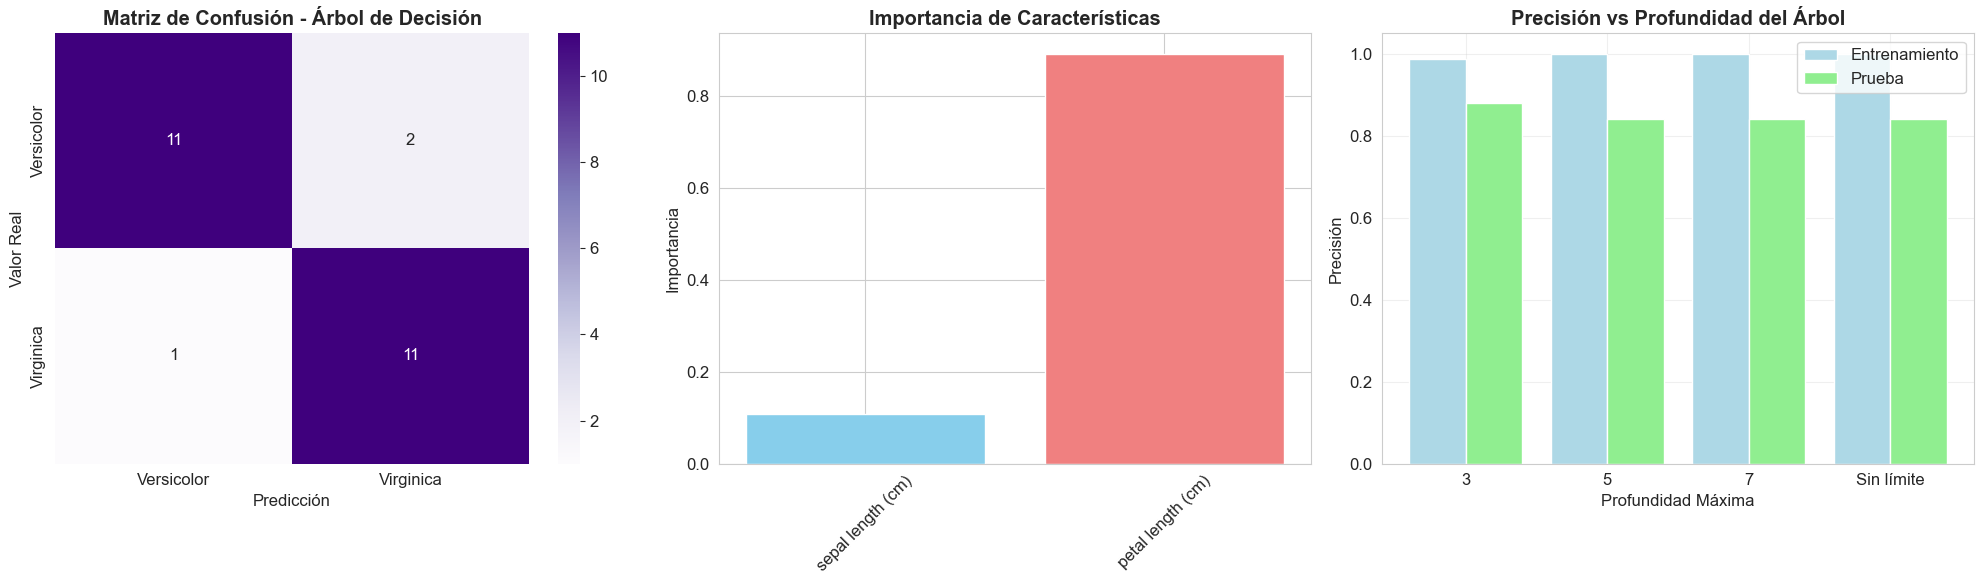

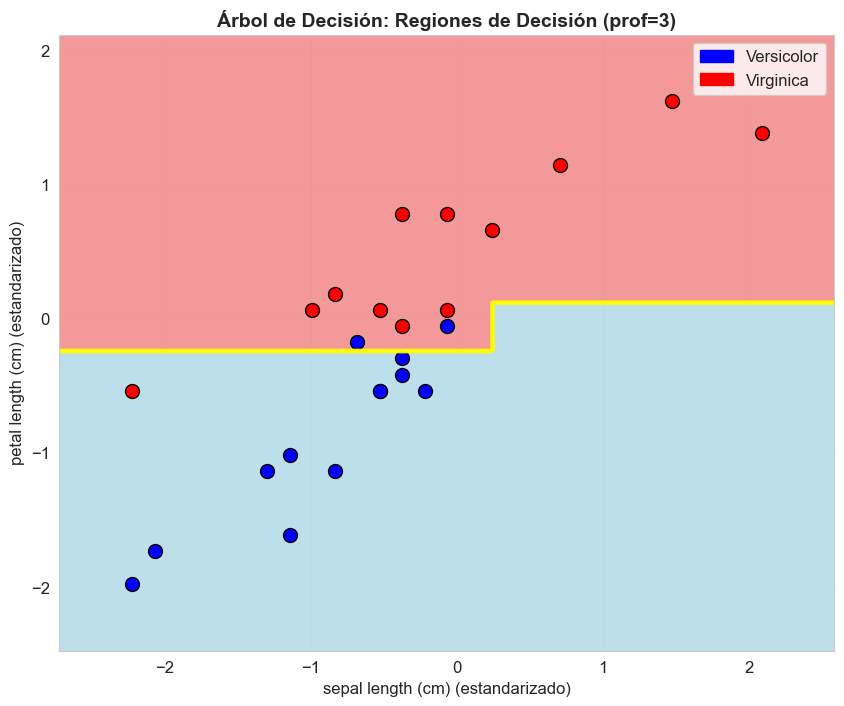


📋 REPORTE DETALLADO DE CLASIFICACIÓN:
              precision    recall  f1-score   support

  Versicolor       0.92      0.85      0.88        13
   Virginica       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

✅ Análisis de Árbol de Decisión completado


In [12]:
# ============================================================================
# 10. CLASIFICACIÓN CON ÁRBOL DE DECISIÓN
# ============================================================================

print("\n🌳 10. CLASIFICACIÓN CON ÁRBOL DE DECISIÓN")
print("="*50)

print("📚 ACERCA DE ÁRBOL DE DECISIÓN:")
print("""
🔹 PRINCIPIO:
   • Crea un modelo en forma de árbol de decisiones
   • Divide iterativamente el dataset basándose en características
   • Usa medidas como Gini o entropía para divisiones óptimas

🔹 VENTAJAS:
   • Fácil de entender e interpretar
   • Requiere poca preparación de datos
   • Maneja valores numéricos y categóricos
   • Puede capturar relaciones no lineales

🔹 DESVENTAJAS:
   • Propenso al sobreajuste
   • Inestable (pequeños cambios pueden crear árboles diferentes)
   • Puede crear sesgos si algunas clases dominan
""")

# Probar diferentes parámetros
max_depths = [3, 5, 7, None]
dt_results = {}

print(f"\n🧪 PROBANDO DIFERENTES PROFUNDIDADES MÁXIMAS:")

for max_depth in max_depths:
    # Entrenar modelo
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred_train = dt.predict(X_train_scaled)
    y_pred_test = dt.predict(X_test_scaled)
    
    # Métricas
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    dt_results[max_depth] = {
        'model': dt,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred_test
    }
    
    depth_str = str(max_depth) if max_depth is not None else "Sin límite"
    print(f"   Profundidad {depth_str}: Train Acc={train_accuracy:.3f}, Test Acc={test_accuracy:.3f}, F1={f1:.3f}")

# Seleccionar mejor profundidad
best_depth = max(dt_results.keys(), key=lambda d: dt_results[d]['test_accuracy'])
best_dt = dt_results[best_depth]

depth_str = str(best_depth) if best_depth is not None else "Sin límite"
print(f"\n🏆 MEJOR RESULTADO: profundidad={depth_str}")
print(f"   • Precisión en entrenamiento: {best_dt['train_accuracy']:.3f}")
print(f"   • Precisión en prueba: {best_dt['test_accuracy']:.3f}")
print(f"   • Precisión (Precision): {best_dt['precision']:.3f}")
print(f"   • Recall: {best_dt['recall']:.3f}")
print(f"   • F1-Score: {best_dt['f1']:.3f}")

# Información del árbol
best_model = best_dt['model']
print(f"\n🌳 INFORMACIÓN DEL ÁRBOL:")
print(f"   • Profundidad real del árbol: {best_model.get_depth()}")
print(f"   • Número de hojas: {best_model.get_n_leaves()}")
print(f"   • Número de nodos: {best_model.tree_.node_count}")

# Importancia de características
feature_importance = best_model.feature_importances_
print(f"\n📊 IMPORTANCIA DE CARACTERÍSTICAS:")
for i, importance in enumerate(feature_importance):
    print(f"   • {selected_features[i]}: {importance:.3f}")

# Matriz de confusión
cm_dt = confusion_matrix(y_test, best_dt['y_pred'])
print(f"\n📊 MATRIZ DE CONFUSIÓN:")
print(cm_dt)

# Visualizaciones
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Matriz de confusión
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', 
           xticklabels=binary_target_names, yticklabels=binary_target_names, ax=axes[0])
axes[0].set_title('Matriz de Confusión - Árbol de Decisión', fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

# Importancia de características
axes[1].bar(selected_features, feature_importance, color=['skyblue', 'lightcoral'])
axes[1].set_title('Importancia de Características', fontweight='bold')
axes[1].set_ylabel('Importancia')
axes[1].tick_params(axis='x', rotation=45)

# Comparación de precisión por profundidad
depths = list(dt_results.keys())
train_accs = [dt_results[d]['train_accuracy'] for d in depths]
test_accs = [dt_results[d]['test_accuracy'] for d in depths]

depth_labels = [str(d) if d is not None else "Sin límite" for d in depths]
x_pos = np.arange(len(depth_labels))

axes[2].bar(x_pos - 0.2, train_accs, 0.4, label='Entrenamiento', color='lightblue')
axes[2].bar(x_pos + 0.2, test_accs, 0.4, label='Prueba', color='lightgreen')
axes[2].set_xlabel('Profundidad Máxima')
axes[2].set_ylabel('Precisión')
axes[2].set_title('Precisión vs Profundidad del Árbol', fontweight='bold')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(depth_labels)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualización de regiones de decisión
decision_region(X_test_scaled, y_test, best_dt['model'], 
               title=f'Árbol de Decisión: Regiones de Decisión (prof={depth_str})',
               xlabel=f'{selected_features[0]} (estandarizado)',
               ylabel=f'{selected_features[1]} (estandarizado)',
               target_names=binary_target_names)

# Reporte de clasificación
print(f"\n📋 REPORTE DETALLADO DE CLASIFICACIÓN:")
print(classification_report(y_test, best_dt['y_pred'], 
                          target_names=binary_target_names))

print("✅ Análisis de Árbol de Decisión completado")



🌲 11. CLASIFICACIÓN CON RANDOM FOREST
📚 ACERCA DE RANDOM FOREST:

🔹 PRINCIPIO:
   • Ensemble de múltiples árboles de decisión
   • Cada árbol se entrena con muestra aleatoria de datos y características
   • Predicción final por votación mayoritaria

🔹 VENTAJAS:
   • Reduce sobreajuste comparado con árbol individual
   • Proporciona importancia de características
   • Robusto ante outliers y ruido
   • Funciona bien sin mucho ajuste de parámetros

🔹 DESVENTAJAS:
   • Menos interpretable que árbol individual
   • Puede sobreajustar con datasets muy ruidosos
   • Requiere más memoria y computación


🧪 PROBANDO DIFERENTES NÚMEROS DE ÁRBOLES:
   10 árboles: Train Acc=1.000, Test Acc=0.840, F1=0.833
   50 árboles: Train Acc=1.000, Test Acc=0.880, F1=0.880
   100 árboles: Train Acc=1.000, Test Acc=0.880, F1=0.880
   200 árboles: Train Acc=1.000, Test Acc=0.880, F1=0.880

🏆 MEJOR RESULTADO: 50 árboles
   • Precisión en entrenamiento: 1.000
   • Precisión en prueba: 0.880
   • Precisión (Preci

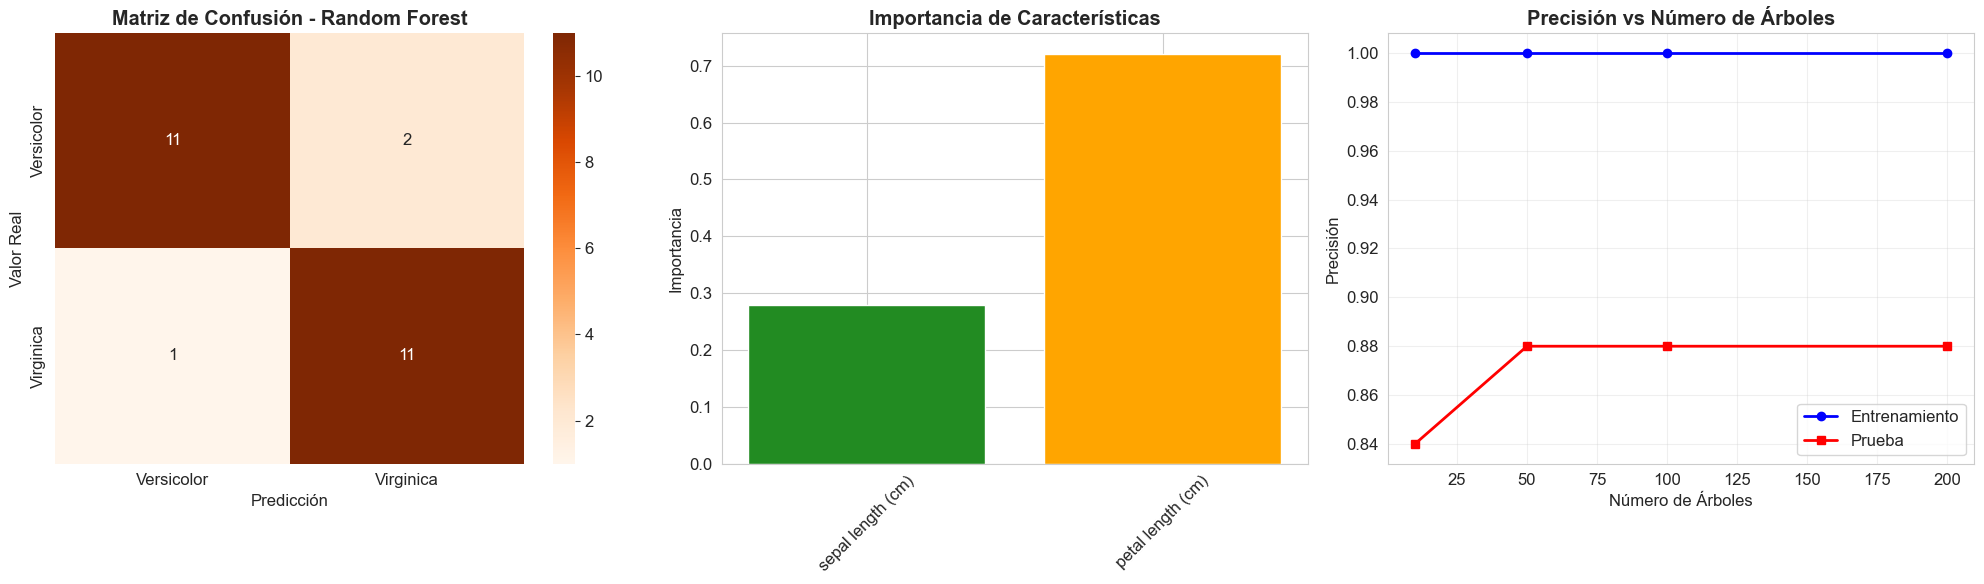

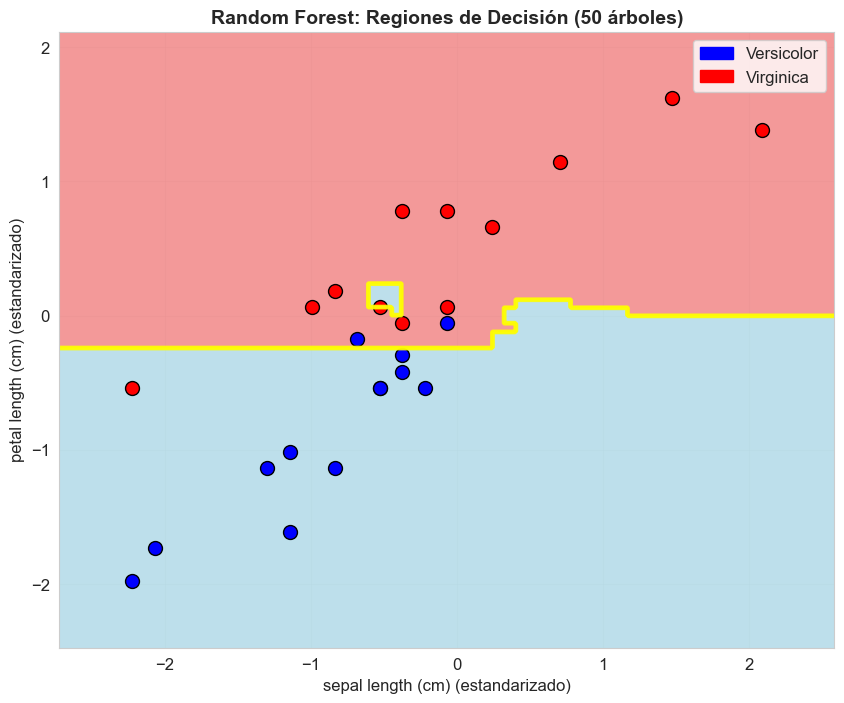


📋 REPORTE DETALLADO DE CLASIFICACIÓN:
              precision    recall  f1-score   support

  Versicolor       0.92      0.85      0.88        13
   Virginica       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

✅ Análisis de Random Forest completado


In [13]:
# ============================================================================
# 11. CLASIFICACIÓN CON RANDOM FOREST
# ============================================================================

print("\n🌲 11. CLASIFICACIÓN CON RANDOM FOREST")
print("="*45)

print("📚 ACERCA DE RANDOM FOREST:")
print("""
🔹 PRINCIPIO:
   • Ensemble de múltiples árboles de decisión
   • Cada árbol se entrena con muestra aleatoria de datos y características
   • Predicción final por votación mayoritaria

🔹 VENTAJAS:
   • Reduce sobreajuste comparado con árbol individual
   • Proporciona importancia de características
   • Robusto ante outliers y ruido
   • Funciona bien sin mucho ajuste de parámetros

🔹 DESVENTAJAS:
   • Menos interpretable que árbol individual
   • Puede sobreajustar con datasets muy ruidosos
   • Requiere más memoria y computación
""")

# Probar diferentes números de árboles
n_estimators_list = [10, 50, 100, 200]
rf_results = {}

print(f"\n🧪 PROBANDO DIFERENTES NÚMEROS DE ÁRBOLES:")

for n_estimators in n_estimators_list:
    # Entrenar modelo
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred_train = rf.predict(X_train_scaled)
    y_pred_test = rf.predict(X_test_scaled)
    
    # Métricas
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    rf_results[n_estimators] = {
        'model': rf,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred_test
    }
    
    print(f"   {n_estimators} árboles: Train Acc={train_accuracy:.3f}, Test Acc={test_accuracy:.3f}, F1={f1:.3f}")

# Seleccionar mejor número de árboles
best_n_estimators = max(rf_results.keys(), key=lambda n: rf_results[n]['test_accuracy'])
best_rf = rf_results[best_n_estimators]

print(f"\n🏆 MEJOR RESULTADO: {best_n_estimators} árboles")
print(f"   • Precisión en entrenamiento: {best_rf['train_accuracy']:.3f}")
print(f"   • Precisión en prueba: {best_rf['test_accuracy']:.3f}")
print(f"   • Precisión (Precision): {best_rf['precision']:.3f}")
print(f"   • Recall: {best_rf['recall']:.3f}")
print(f"   • F1-Score: {best_rf['f1']:.3f}")

# Importancia de características
best_model = best_rf['model']
feature_importance_rf = best_model.feature_importances_
print(f"\n📊 IMPORTANCIA DE CARACTERÍSTICAS:")
for i, importance in enumerate(feature_importance_rf):
    print(f"   • {selected_features[i]}: {importance:.3f}")

# Matriz de confusión
cm_rf = confusion_matrix(y_test, best_rf['y_pred'])
print(f"\n📊 MATRIZ DE CONFUSIÓN:")
print(cm_rf)

# Visualizaciones
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Matriz de confusión
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', 
           xticklabels=binary_target_names, yticklabels=binary_target_names, ax=axes[0])
axes[0].set_title('Matriz de Confusión - Random Forest', fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

# Importancia de características
axes[1].bar(selected_features, feature_importance_rf, color=['forestgreen', 'orange'])
axes[1].set_title('Importancia de Características', fontweight='bold')
axes[1].set_ylabel('Importancia')
axes[1].tick_params(axis='x', rotation=45)

# Comparación de precisión por número de árboles
n_trees = list(rf_results.keys())
train_accs_rf = [rf_results[n]['train_accuracy'] for n in n_trees]
test_accs_rf = [rf_results[n]['test_accuracy'] for n in n_trees]

axes[2].plot(n_trees, train_accs_rf, 'o-', label='Entrenamiento', color='blue', linewidth=2)
axes[2].plot(n_trees, test_accs_rf, 's-', label='Prueba', color='red', linewidth=2)
axes[2].set_xlabel('Número de Árboles')
axes[2].set_ylabel('Precisión')
axes[2].set_title('Precisión vs Número de Árboles', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualización de regiones de decisión
decision_region(X_test_scaled, y_test, best_rf['model'], 
               title=f'Random Forest: Regiones de Decisión ({best_n_estimators} árboles)',
               xlabel=f'{selected_features[0]} (estandarizado)',
               ylabel=f'{selected_features[1]} (estandarizado)',
               target_names=binary_target_names)

# Reporte de clasificación
print(f"\n📋 REPORTE DETALLADO DE CLASIFICACIÓN:")
print(classification_report(y_test, best_rf['y_pred'], 
                          target_names=binary_target_names))

print("✅ Análisis de Random Forest completado")



📊 12. COMPARACIÓN INTEGRAL DE MÉTODOS
📋 TABLA COMPARATIVA DE RESULTADOS:
Método               Parámetros      Train Acc  Test Acc   Precision  Recall   F1      
--------------------------------------------------------------------------------
k-NN                 k=7             0.973      0.880      0.846      0.917    0.880   
Regresión Logística  default         0.947      0.920      0.917      0.917    0.917   
SVM                  kernel=linear   0.947      0.920      0.917      0.917    0.917   
Árbol de Decisión    max_depth=3     0.987      0.880      0.846      0.917    0.880   
Random Forest        n_estimators=50 1.000      0.880      0.846      0.917    0.880   

🏆 MEJOR MÉTODO GENERAL: Regresión Logística
   • Precisión en prueba: 0.920
   • F1-Score: 0.917
   • Parámetros: default


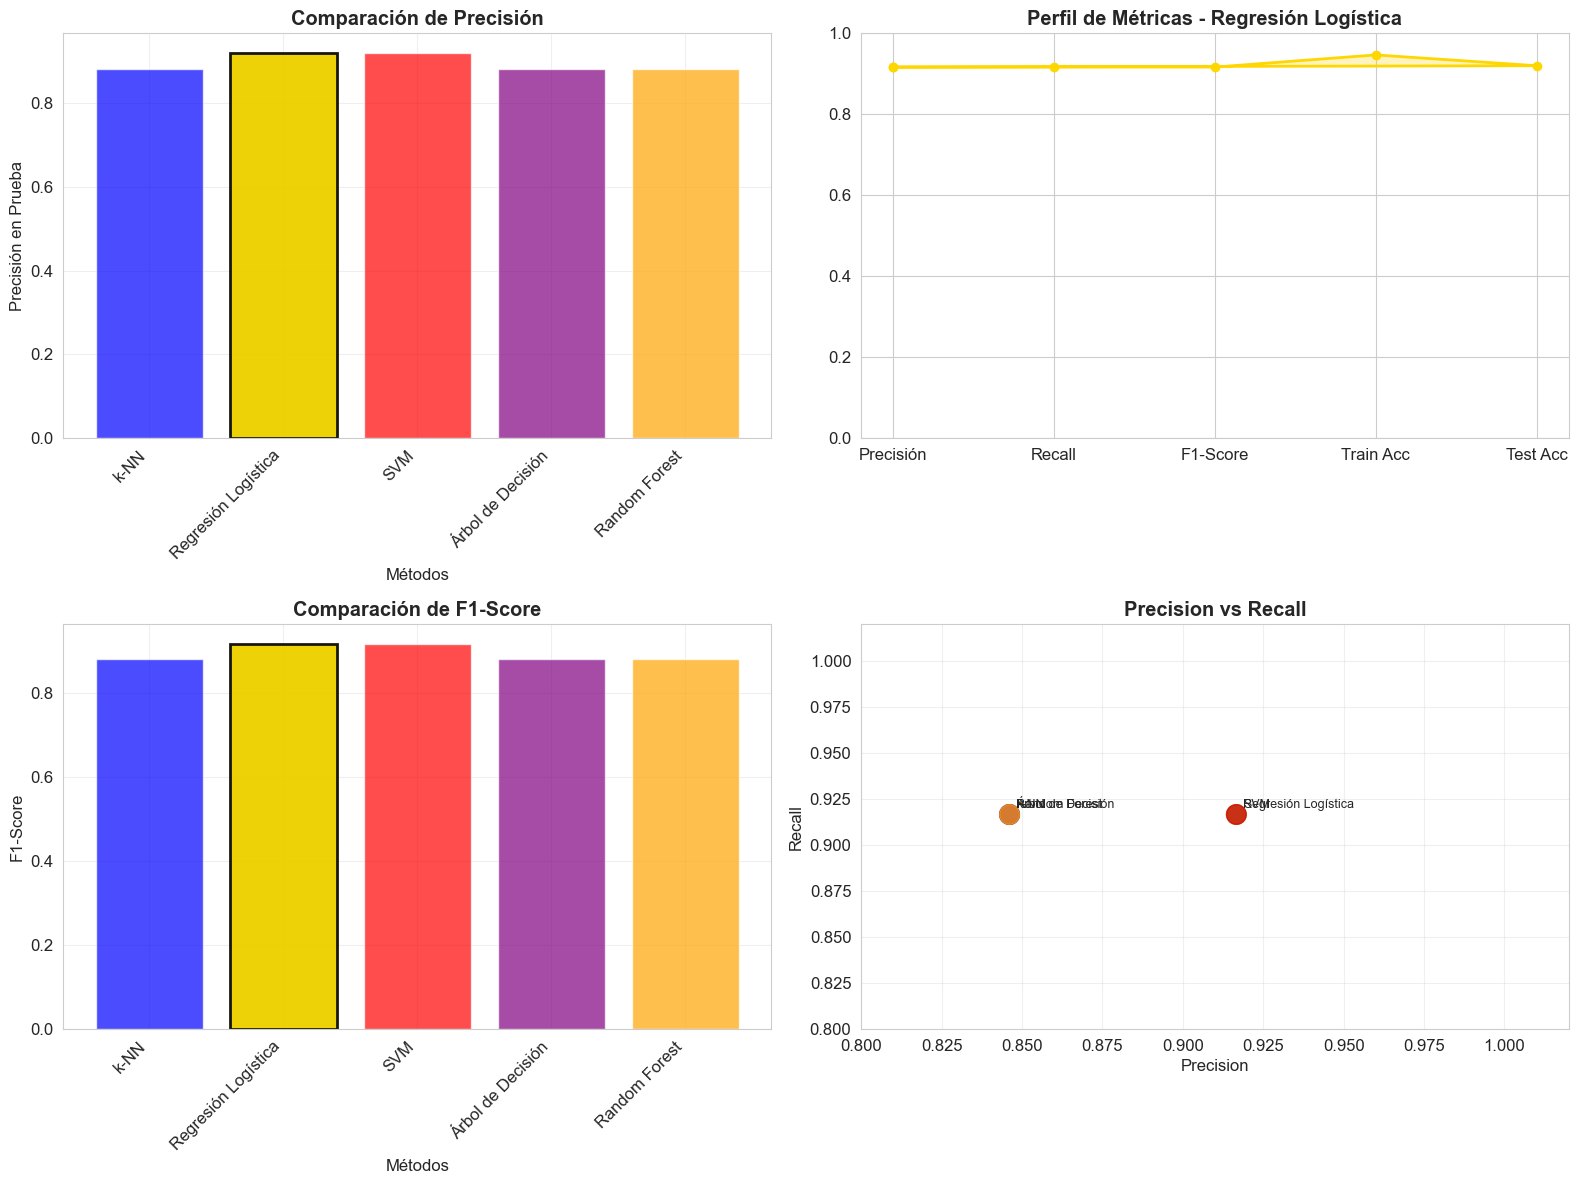


🔍 ANÁLISIS DE SOBREAJUSTE:
------------------------------
   • k-NN                : Gap=0.093 🔴 Posible sobreajuste
   • Regresión Logística : Gap=0.027 🟡 Sobreajuste leve
   • SVM                 : Gap=0.027 🟡 Sobreajuste leve
   • Árbol de Decisión   : Gap=0.107 🔴 Posible sobreajuste
   • Random Forest       : Gap=0.120 🔴 Posible sobreajuste
✅ Comparación integral completada


In [14]:
# ============================================================================
# 12. COMPARACIÓN DE TODOS LOS MÉTODOS
# ============================================================================

print("\n📊 12. COMPARACIÓN INTEGRAL DE MÉTODOS")
print("="*50)

# Recopilar mejores resultados de cada método
methods_comparison = {
    'k-NN': {
        'model': best_knn['model'],
        'params': f"k={best_k}",
        'train_accuracy': best_knn['train_accuracy'],
        'test_accuracy': best_knn['test_accuracy'],
        'precision': best_knn['precision'],
        'recall': best_knn['recall'],
        'f1': best_knn['f1']
    },
    'Regresión Logística': {
        'model': lr,
        'params': "default",
        'train_accuracy': train_accuracy_lr,
        'test_accuracy': test_accuracy_lr,
        'precision': precision_lr,
        'recall': recall_lr,
        'f1': f1_lr
    },
    'SVM': {
        'model': best_svm['model'],
        'params': f"kernel={best_kernel}",
        'train_accuracy': best_svm['train_accuracy'],
        'test_accuracy': best_svm['test_accuracy'],
        'precision': best_svm['precision'],
        'recall': best_svm['recall'],
        'f1': best_svm['f1']
    },
    'Árbol de Decisión': {
        'model': best_dt['model'],
        'params': f"max_depth={best_depth}",
        'train_accuracy': best_dt['train_accuracy'],
        'test_accuracy': best_dt['test_accuracy'],
        'precision': best_dt['precision'],
        'recall': best_dt['recall'],
        'f1': best_dt['f1']
    },
    'Random Forest': {
        'model': best_rf['model'],
        'params': f"n_estimators={best_n_estimators}",
        'train_accuracy': best_rf['train_accuracy'],
        'test_accuracy': best_rf['test_accuracy'],
        'precision': best_rf['precision'],
        'recall': best_rf['recall'],
        'f1': best_rf['f1']
    }
}

# Crear tabla comparativa
print("📋 TABLA COMPARATIVA DE RESULTADOS:")
print("="*80)
print(f"{'Método':<20} {'Parámetros':<15} {'Train Acc':<10} {'Test Acc':<10} {'Precision':<10} {'Recall':<8} {'F1':<8}")
print("-" * 80)

for method_name, results in methods_comparison.items():
    print(f"{method_name:<20} {results['params']:<15} {results['train_accuracy']:<10.3f} "
          f"{results['test_accuracy']:<10.3f} {results['precision']:<10.3f} "
          f"{results['recall']:<8.3f} {results['f1']:<8.3f}")

# Encontrar el mejor método
best_method = max(methods_comparison.keys(), 
                 key=lambda method: methods_comparison[method]['test_accuracy'])

print(f"\n🏆 MEJOR MÉTODO GENERAL: {best_method}")
print(f"   • Precisión en prueba: {methods_comparison[best_method]['test_accuracy']:.3f}")
print(f"   • F1-Score: {methods_comparison[best_method]['f1']:.3f}")
print(f"   • Parámetros: {methods_comparison[best_method]['params']}")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Comparación de métricas
methods = list(methods_comparison.keys())
test_accuracies = [methods_comparison[m]['test_accuracy'] for m in methods]
precisions = [methods_comparison[m]['precision'] for m in methods]
recalls = [methods_comparison[m]['recall'] for m in methods]
f1_scores = [methods_comparison[m]['f1'] for m in methods]

# Gráfico de barras - Precisión
x_pos = np.arange(len(methods))
axes[0,0].bar(x_pos, test_accuracies, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)
axes[0,0].set_xlabel('Métodos')
axes[0,0].set_ylabel('Precisión en Prueba')
axes[0,0].set_title('Comparación de Precisión', fontweight='bold')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(methods, rotation=45, ha='right')
axes[0,0].grid(True, alpha=0.3)

# Resaltar el mejor
best_idx = methods.index(best_method)
axes[0,0].bar(best_idx, test_accuracies[best_idx], color='gold', alpha=0.9, 
             edgecolor='black', linewidth=2)

# Gráfico radar de métricas para el mejor método
from math import pi

metrics_labels = ['Precisión', 'Recall', 'F1-Score', 'Train Acc', 'Test Acc']
best_values = [
    methods_comparison[best_method]['precision'],
    methods_comparison[best_method]['recall'],
    methods_comparison[best_method]['f1'],
    methods_comparison[best_method]['train_accuracy'],
    methods_comparison[best_method]['test_accuracy']
]

angles = [n / float(len(metrics_labels)) * 2 * pi for n in range(len(metrics_labels))]
angles += angles[:1]  # Completar el círculo
best_values += best_values[:1]

axes[0,1].plot(angles, best_values, 'o-', linewidth=2, label=best_method, color='gold')
axes[0,1].fill(angles, best_values, alpha=0.25, color='gold')
axes[0,1].set_xticks(angles[:-1])
axes[0,1].set_xticklabels(metrics_labels)
axes[0,1].set_ylim(0, 1)
axes[0,1].set_title(f'Perfil de Métricas - {best_method}', fontweight='bold')
axes[0,1].grid(True)

# Comparación de F1-Score
axes[1,0].bar(x_pos, f1_scores, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)
axes[1,0].bar(best_idx, f1_scores[best_idx], color='gold', alpha=0.9, 
             edgecolor='black', linewidth=2)
axes[1,0].set_xlabel('Métodos')
axes[1,0].set_ylabel('F1-Score')
axes[1,0].set_title('Comparación de F1-Score', fontweight='bold')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(methods, rotation=45, ha='right')
axes[1,0].grid(True, alpha=0.3)

# Scatter plot: Precision vs Recall
axes[1,1].scatter(precisions, recalls, s=200, alpha=0.7, 
                 c=['blue', 'green', 'red', 'purple', 'orange'])

# Anotar cada punto con el nombre del método
for i, method in enumerate(methods):
    axes[1,1].annotate(method, (precisions[i], recalls[i]), 
                      xytext=(5, 5), textcoords='offset points', fontsize=9)

axes[1,1].set_xlabel('Precision')
axes[1,1].set_ylabel('Recall')
axes[1,1].set_title('Precision vs Recall', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xlim(0.8, 1.02)
axes[1,1].set_ylim(0.8, 1.02)

plt.tight_layout()
plt.show()

# Análisis de sobreajuste
print(f"\n🔍 ANÁLISIS DE SOBREAJUSTE:")
print("-" * 30)
for method_name, results in methods_comparison.items():
    train_acc = results['train_accuracy']
    test_acc = results['test_accuracy']
    gap = train_acc - test_acc
    
    if gap > 0.05:
        status = "🔴 Posible sobreajuste"
    elif gap > 0.02:
        status = "🟡 Sobreajuste leve"
    else:
        status = "🟢 Buen balance"
    
    print(f"   • {method_name:<20}: Gap={gap:.3f} {status}")

print("✅ Comparación integral completada")



⚖️ 13. IMPACTO DE LA ESTANDARIZACIÓN
🔍 EVALUANDO EL IMPACTO DE LA ESTANDARIZACIÓN:
   Compararemos k-NN y SVM con datos originales vs estandarizados

📊 COMPARACIÓN k-NN:
   • Sin estandarización: 0.880
   • Con estandarización: 0.880
   • Mejora: +0.000

📊 COMPARACIÓN SVM:
   • Sin estandarización: 0.920
   • Con estandarización: 0.920
   • Mejora: +0.000

📊 COMPARACIÓN REGRESIÓN LOGÍSTICA:
   • Sin estandarización: 0.960
   • Con estandarización: 0.920
   • Mejora: -0.040


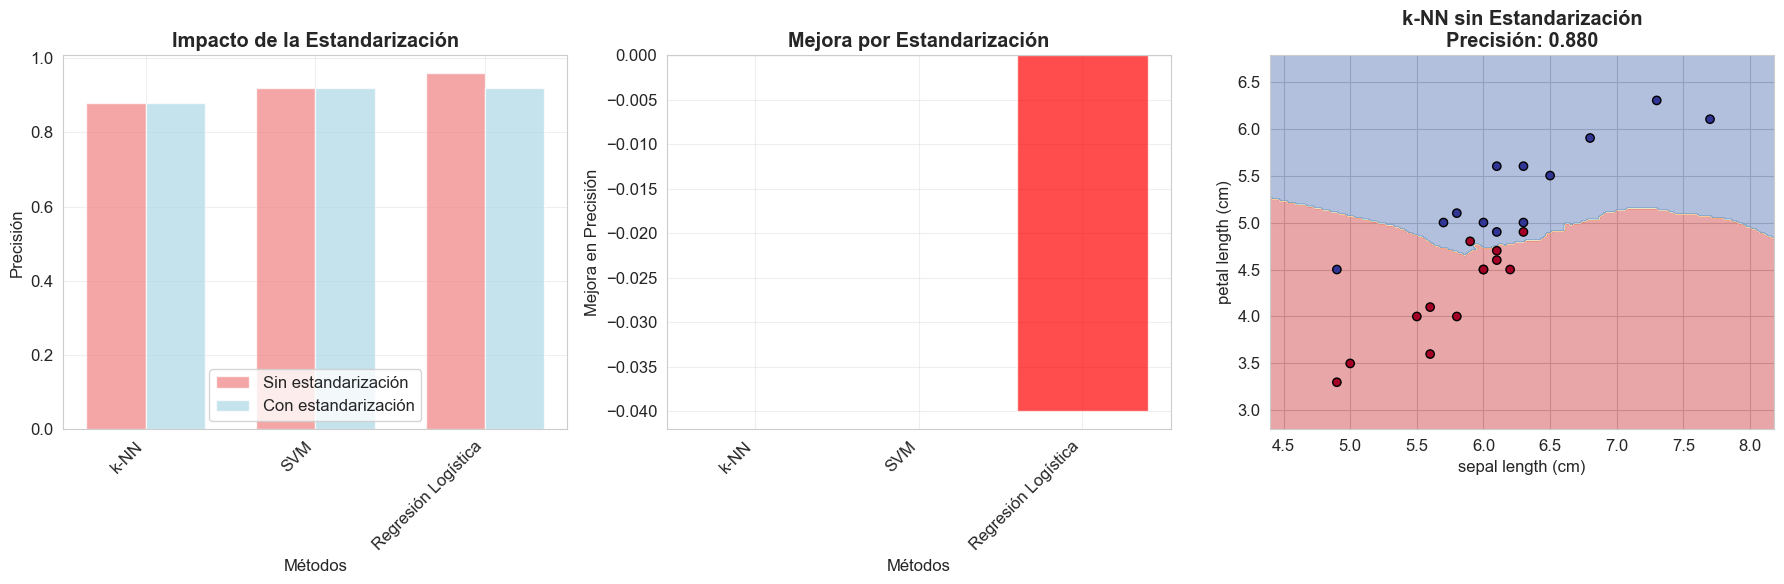


🔍 ANÁLISIS DETALLADO DEL IMPACTO:
-----------------------------------

💡 CONCLUSIONES SOBRE ESTANDARIZACIÓN:

🔹 K-NEAREST NEIGHBORS:
   • MUY sensible a la escala de características
   • Usa distancia euclidiana directamente
   • Sin estandarización, características con mayor rango dominan

🔹 SUPPORT VECTOR MACHINE:
   • EXTREMADAMENTE sensible a la escala
   • Busca hiperplano óptimo basado en distancias
   • Estandarización es casi obligatoria

🔹 REGRESIÓN LOGÍSTICA:
   • MODERADAMENTE sensible a la escala
   • Algoritmo de optimización converge mejor con datos estandarizados
   • Coeficientes más interpretables después de estandarización

🔹 ÁRBOLES DE DECISIÓN Y RANDOM FOREST:
   • NO sensibles a la escala (no mostrado, pero importante saberlo)
   • Usan divisiones basadas en valores absolutos
   • Estandarización no mejora significativamente


💡 RECOMENDACIONES:
   • SIEMPRE estandarizar para: k-NN, SVM, Regresión Logística, Redes Neuronales
   • OPCIONAL para: Árboles de Decisión

In [16]:
# ============================================================================
# 13. COMPARACIÓN CON Y SIN ESTANDARIZACIÓN
# ============================================================================

print("\n⚖️ 13. IMPACTO DE LA ESTANDARIZACIÓN")
print("="*40)

print("🔍 EVALUANDO EL IMPACTO DE LA ESTANDARIZACIÓN:")
print("   Compararemos k-NN y SVM con datos originales vs estandarizados")

# Usar datos sin estandarizar
X_train_original = X_train
X_test_original = X_test

# Diccionario para almacenar resultados
standardization_comparison = {}

# Probar k-NN
print(f"\n📊 COMPARACIÓN k-NN:")
# Sin estandarización
knn_orig = KNeighborsClassifier(n_neighbors=best_k)
knn_orig.fit(X_train_original, y_train)
y_pred_knn_orig = knn_orig.predict(X_test_original)
acc_knn_orig = accuracy_score(y_test, y_pred_knn_orig)

# Con estandarización (ya calculado)
acc_knn_scaled = best_knn['test_accuracy']

print(f"   • Sin estandarización: {acc_knn_orig:.3f}")
print(f"   • Con estandarización: {acc_knn_scaled:.3f}")
print(f"   • Mejora: {acc_knn_scaled - acc_knn_orig:+.3f}")

standardization_comparison['k-NN'] = {
    'original': acc_knn_orig,
    'scaled': acc_knn_scaled,
    'improvement': acc_knn_scaled - acc_knn_orig
}

# Probar SVM
print(f"\n📊 COMPARACIÓN SVM:")
# Sin estandarización
svm_orig = SVC(kernel=best_kernel, random_state=42)
svm_orig.fit(X_train_original, y_train)
y_pred_svm_orig = svm_orig.predict(X_test_original)
acc_svm_orig = accuracy_score(y_test, y_pred_svm_orig)

# Con estandarización (ya calculado)
acc_svm_scaled = best_svm['test_accuracy']

print(f"   • Sin estandarización: {acc_svm_orig:.3f}")
print(f"   • Con estandarización: {acc_svm_scaled:.3f}")
print(f"   • Mejora: {acc_svm_scaled - acc_svm_orig:+.3f}")

standardization_comparison['SVM'] = {
    'original': acc_svm_orig,
    'scaled': acc_svm_scaled,
    'improvement': acc_svm_scaled - acc_svm_orig
}

# Probar Regresión Logística
print(f"\n📊 COMPARACIÓN REGRESIÓN LOGÍSTICA:")
# Sin estandarización
lr_orig = LogisticRegression(random_state=42, max_iter=1000)
lr_orig.fit(X_train_original, y_train)
y_pred_lr_orig = lr_orig.predict(X_test_original)
acc_lr_orig = accuracy_score(y_test, y_pred_lr_orig)

# Con estandarización (ya calculado)
acc_lr_scaled = test_accuracy_lr

print(f"   • Sin estandarización: {acc_lr_orig:.3f}")
print(f"   • Con estandarización: {acc_lr_scaled:.3f}")
print(f"   • Mejora: {acc_lr_scaled - acc_lr_orig:+.3f}")

standardization_comparison['Regresión Logística'] = {
    'original': acc_lr_orig,
    'scaled': acc_lr_scaled,
    'improvement': acc_lr_scaled - acc_lr_orig
}

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

methods = list(standardization_comparison.keys())
original_accs = [standardization_comparison[m]['original'] for m in methods]
scaled_accs = [standardization_comparison[m]['scaled'] for m in methods]
improvements = [standardization_comparison[m]['improvement'] for m in methods]

# Comparación lado a lado
x_pos = np.arange(len(methods))
width = 0.35

bars1 = axes[0].bar(x_pos - width/2, original_accs, width, 
                   label='Sin estandarización', color='lightcoral', alpha=0.7)
bars2 = axes[0].bar(x_pos + width/2, scaled_accs, width, 
                   label='Con estandarización', color='lightblue', alpha=0.7)

axes[0].set_xlabel('Métodos')
axes[0].set_ylabel('Precisión')
axes[0].set_title('Impacto de la Estandarización', fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(methods, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Mejoras por método
colors = ['red' if imp < 0 else 'green' for imp in improvements]
axes[1].bar(x_pos, improvements, color=colors, alpha=0.7)
axes[1].set_xlabel('Métodos')
axes[1].set_ylabel('Mejora en Precisión')
axes[1].set_title('Mejora por Estandarización', fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(methods, rotation=45, ha='right')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1].grid(True, alpha=0.3)

# Regiones de decisión comparativas para k-NN
# Sin estandarización
step = 0.02
x_min, x_max = X_test_original[:, 0].min() - 0.5, X_test_original[:, 0].max() + 0.5
y_min, y_max = X_test_original[:, 1].min() - 0.5, X_test_original[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn_orig.predict(mesh_points)
Z = Z.reshape(xx.shape)

axes[2].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
scatter = axes[2].scatter(X_test_original[:, 0], X_test_original[:, 1], 
                         c=y_test, cmap=plt.cm.RdYlBu, edgecolors='black')
axes[2].set_xlabel(selected_features[0])
axes[2].set_ylabel(selected_features[1])
axes[2].set_title(f'k-NN sin Estandarización\nPrecisión: {acc_knn_orig:.3f}', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis detallado
print(f"\n🔍 ANÁLISIS DETALLADO DEL IMPACTO:")
print("-" * 35)

print("""
💡 CONCLUSIONES SOBRE ESTANDARIZACIÓN:

🔹 K-NEAREST NEIGHBORS:
   • MUY sensible a la escala de características
   • Usa distancia euclidiana directamente
   • Sin estandarización, características con mayor rango dominan

🔹 SUPPORT VECTOR MACHINE:
   • EXTREMADAMENTE sensible a la escala
   • Busca hiperplano óptimo basado en distancias
   • Estandarización es casi obligatoria

🔹 REGRESIÓN LOGÍSTICA:
   • MODERADAMENTE sensible a la escala
   • Algoritmo de optimización converge mejor con datos estandarizados
   • Coeficientes más interpretables después de estandarización

🔹 ÁRBOLES DE DECISIÓN Y RANDOM FOREST:
   • NO sensibles a la escala (no mostrado, pero importante saberlo)
   • Usan divisiones basadas en valores absolutos
   • Estandarización no mejora significativamente
""")

# Recomendaciones
print(f"\n💡 RECOMENDACIONES:")
print(f"   • SIEMPRE estandarizar para: k-NN, SVM, Regresión Logística, Redes Neuronales")
print(f"   • OPCIONAL para: Árboles de Decisión, Random Forest, Naive Bayes")
print(f"   • REGLA GENERAL: Cuando no estés seguro, estandariza")

print("✅ Análisis de estandarización completado")



🌺 14. CLASIFICACIÓN MULTICLASE - TODAS LAS ESPECIES
🎯 OBJETIVO: Clasificar las 3 especies de iris usando todas las características
   • Especies: Setosa, Versicolor, Virginica
   • Características: Todas las 4 características originales
   • Tipo: Clasificación Multiclase

📊 DATASET MULTICLASE:
   • Muestras: 150
   • Características: 4
   • Clases: 3 (setosa, versicolor, virginica)

🔢 Distribución de clases:
   • setosa: 50 muestras (33.3%)
   • versicolor: 50 muestras (33.3%)
   • virginica: 50 muestras (33.3%)

🧪 ENTRENANDO MODELOS PARA CLASIFICACIÓN MULTICLASE:

📊 RESULTADOS CLASIFICACIÓN MULTICLASE:
----------------------------------------
   • k-NN                : 0.921
   • Regresión Logística : 0.921
   • SVM                 : 0.947
   • Árbol de Decisión   : 0.895
   • Random Forest       : 0.921

🏆 MEJOR MÉTODO MULTICLASE: SVM
   • Precisión: 0.947

📊 MATRIZ DE CONFUSIÓN MULTICLASE (SVM):
[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]


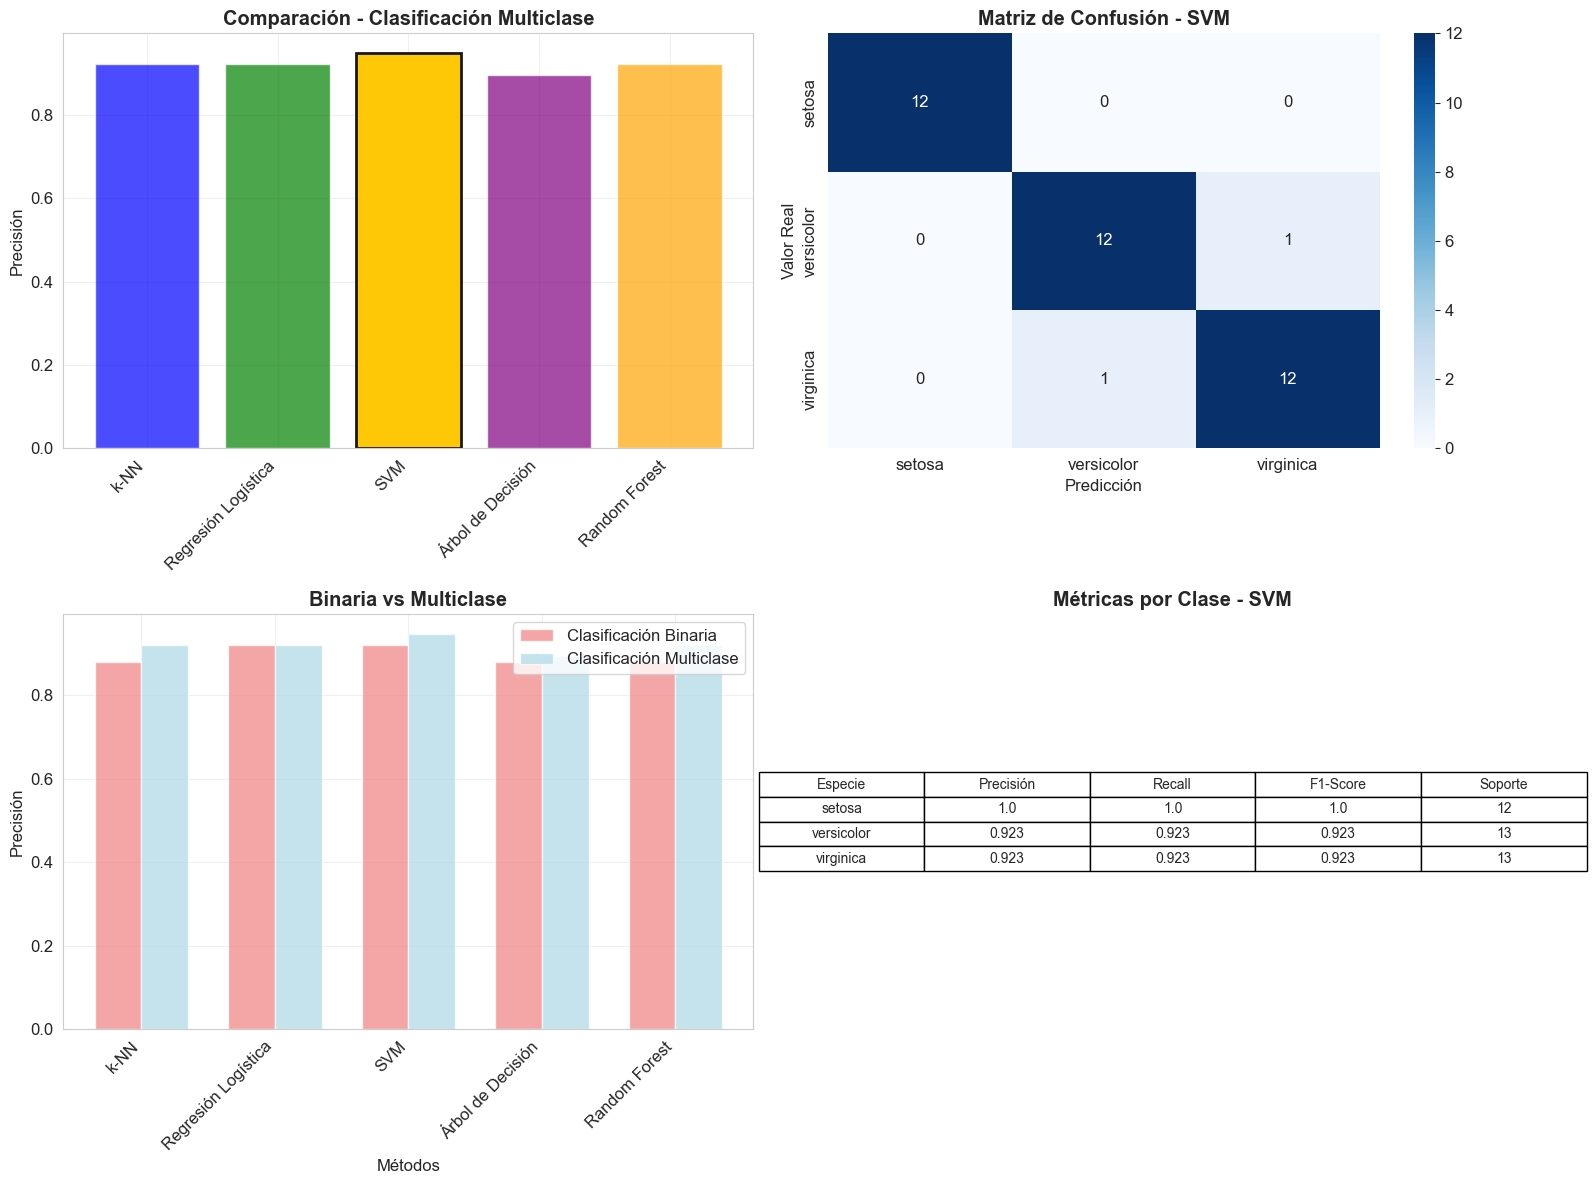


📋 REPORTE COMPLETO MULTICLASE (SVM):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38


📊 MÉTRICAS PROMEDIADAS:
   • Precisión Macro: 0.949
   • Recall Macro: 0.949
   • F1-Score Macro: 0.949
✅ Análisis de clasificación multiclase completado


In [17]:
# ============================================================================
# 14. CLASIFICACIÓN MULTICLASE (TODAS LAS ESPECIES)
# ============================================================================

print("\n🌺 14. CLASIFICACIÓN MULTICLASE - TODAS LAS ESPECIES")
print("="*60)

print("🎯 OBJETIVO: Clasificar las 3 especies de iris usando todas las características")
print("   • Especies: Setosa, Versicolor, Virginica")
print("   • Características: Todas las 4 características originales")
print("   • Tipo: Clasificación Multiclase")

# Preparar datos multiclase
X_multi = iris.data  # Todas las características
y_multi = iris.target  # Todas las especies
feature_names_multi = iris.feature_names
target_names_multi = iris.target_names

print(f"\n📊 DATASET MULTICLASE:")
print(f"   • Muestras: {X_multi.shape[0]}")
print(f"   • Características: {X_multi.shape[1]}")
print(f"   • Clases: {len(target_names_multi)} ({', '.join(target_names_multi)})")

# División de datos
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.25, random_state=42, stratify=y_multi
)

# Estandarización
scaler_multi = StandardScaler()
X_train_multi_scaled = scaler_multi.fit_transform(X_train_multi)
X_test_multi_scaled = scaler_multi.transform(X_test_multi)

print(f"\n🔢 Distribución de clases:")
unique_multi, counts_multi = np.unique(y_multi, return_counts=True)
for i, (species, count) in enumerate(zip(target_names_multi, counts_multi)):
    percentage = (count / len(y_multi)) * 100
    print(f"   • {species}: {count} muestras ({percentage:.1f}%)")

# Probar todos los métodos en clasificación multiclase
multiclass_results = {}

print(f"\n🧪 ENTRENANDO MODELOS PARA CLASIFICACIÓN MULTICLASE:")

# k-NN
knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train_multi_scaled, y_train_multi)
y_pred_knn_multi = knn_multi.predict(X_test_multi_scaled)
acc_knn_multi = accuracy_score(y_test_multi, y_pred_knn_multi)

multiclass_results['k-NN'] = {
    'model': knn_multi,
    'accuracy': acc_knn_multi,
    'y_pred': y_pred_knn_multi
}

# Regresión Logística
lr_multi = LogisticRegression(random_state=42, max_iter=1000)
lr_multi.fit(X_train_multi_scaled, y_train_multi)
y_pred_lr_multi = lr_multi.predict(X_test_multi_scaled)
acc_lr_multi = accuracy_score(y_test_multi, y_pred_lr_multi)

multiclass_results['Regresión Logística'] = {
    'model': lr_multi,
    'accuracy': acc_lr_multi,
    'y_pred': y_pred_lr_multi
}

# SVM
svm_multi = SVC(kernel='rbf', random_state=42)
svm_multi.fit(X_train_multi_scaled, y_train_multi)
y_pred_svm_multi = svm_multi.predict(X_test_multi_scaled)
acc_svm_multi = accuracy_score(y_test_multi, y_pred_svm_multi)

multiclass_results['SVM'] = {
    'model': svm_multi,
    'accuracy': acc_svm_multi,
    'y_pred': y_pred_svm_multi
}

# Árbol de Decisión
dt_multi = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_multi.fit(X_train_multi_scaled, y_train_multi)
y_pred_dt_multi = dt_multi.predict(X_test_multi_scaled)
acc_dt_multi = accuracy_score(y_test_multi, y_pred_dt_multi)

multiclass_results['Árbol de Decisión'] = {
    'model': dt_multi,
    'accuracy': acc_dt_multi,
    'y_pred': y_pred_dt_multi
}

# Random Forest
rf_multi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_multi.fit(X_train_multi_scaled, y_train_multi)
y_pred_rf_multi = rf_multi.predict(X_test_multi_scaled)
acc_rf_multi = accuracy_score(y_test_multi, y_pred_rf_multi)

multiclass_results['Random Forest'] = {
    'model': rf_multi,
    'accuracy': acc_rf_multi,
    'y_pred': y_pred_rf_multi
}

# Mostrar resultados
print(f"\n📊 RESULTADOS CLASIFICACIÓN MULTICLASE:")
print("-" * 40)
for method_name, results in multiclass_results.items():
    print(f"   • {method_name:<20}: {results['accuracy']:.3f}")

# Encontrar el mejor método para multiclase
best_method_multi = max(multiclass_results.keys(), 
                       key=lambda method: multiclass_results[method]['accuracy'])

print(f"\n🏆 MEJOR MÉTODO MULTICLASE: {best_method_multi}")
print(f"   • Precisión: {multiclass_results[best_method_multi]['accuracy']:.3f}")

# Análisis detallado del mejor método
best_model_multi = multiclass_results[best_method_multi]['model']
best_pred_multi = multiclass_results[best_method_multi]['y_pred']

# Matriz de confusión multiclase
cm_multi = confusion_matrix(y_test_multi, best_pred_multi)
print(f"\n📊 MATRIZ DE CONFUSIÓN MULTICLASE ({best_method_multi}):")
print(cm_multi)

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Comparación de precisiones
methods_multi = list(multiclass_results.keys())
accuracies_multi = [multiclass_results[m]['accuracy'] for m in methods_multi]

axes[0,0].bar(range(len(methods_multi)), accuracies_multi, 
              color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)
axes[0,0].set_xticks(range(len(methods_multi)))
axes[0,0].set_xticklabels(methods_multi, rotation=45, ha='right')
axes[0,0].set_ylabel('Precisión')
axes[0,0].set_title('Comparación - Clasificación Multiclase', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Resaltar el mejor
best_idx_multi = methods_multi.index(best_method_multi)
axes[0,0].bar(best_idx_multi, accuracies_multi[best_idx_multi], 
              color='gold', alpha=0.9, edgecolor='black', linewidth=2)

# Matriz de confusión del mejor método
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', 
           xticklabels=target_names_multi, yticklabels=target_names_multi, ax=axes[0,1])
axes[0,1].set_title(f'Matriz de Confusión - {best_method_multi}', fontweight='bold')
axes[0,1].set_xlabel('Predicción')
axes[0,1].set_ylabel('Valor Real')

# Comparación binaria vs multiclase
binary_accs = [methods_comparison[m]['test_accuracy'] for m in methods_multi 
               if m in methods_comparison]
multi_accs = [multiclass_results[m]['accuracy'] for m in methods_multi 
              if m in methods_comparison]

x_comp = np.arange(len(binary_accs))
width = 0.35

axes[1,0].bar(x_comp - width/2, binary_accs, width, 
              label='Clasificación Binaria', color='lightcoral', alpha=0.7)
axes[1,0].bar(x_comp + width/2, multi_accs, width, 
              label='Clasificación Multiclase', color='lightblue', alpha=0.7)

axes[1,0].set_xlabel('Métodos')
axes[1,0].set_ylabel('Precisión')
axes[1,0].set_title('Binaria vs Multiclase', fontweight='bold')
axes[1,0].set_xticks(x_comp)
axes[1,0].set_xticklabels([m for m in methods_multi if m in methods_comparison], 
                         rotation=45, ha='right')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Reporte de clasificación por clase
from sklearn.metrics import precision_recall_fscore_support

precisions, recalls, f1s, supports = precision_recall_fscore_support(
    y_test_multi, best_pred_multi, average=None)

class_metrics = pd.DataFrame({
    'Especie': target_names_multi,
    'Precisión': precisions,
    'Recall': recalls,
    'F1-Score': f1s,
    'Soporte': supports
})

# Tabla de métricas por clase
axes[1,1].axis('tight')
axes[1,1].axis('off')
table = axes[1,1].table(cellText=class_metrics.round(3).values,
                       colLabels=class_metrics.columns,
                       cellLoc='center',
                       loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1,1].set_title(f'Métricas por Clase - {best_method_multi}', fontweight='bold')

plt.tight_layout()
plt.show()

# Reporte completo
print(f"\n📋 REPORTE COMPLETO MULTICLASE ({best_method_multi}):")
print(classification_report(y_test_multi, best_pred_multi, 
                          target_names=target_names_multi))

# Métricas promedio
precision_macro = precision_score(y_test_multi, best_pred_multi, average='macro')
recall_macro = recall_score(y_test_multi, best_pred_multi, average='macro')
f1_macro = f1_score(y_test_multi, best_pred_multi, average='macro')

print(f"\n📊 MÉTRICAS PROMEDIADAS:")
print(f"   • Precisión Macro: {precision_macro:.3f}")
print(f"   • Recall Macro: {recall_macro:.3f}")
print(f"   • F1-Score Macro: {f1_macro:.3f}")

print("✅ Análisis de clasificación multiclase completado")
